In [10]:
import numpy as np
import pickle
!pip install bcolz
import bcolz

You should consider upgrading via the '/home/varunc/env/bin/python3.7 -m pip install --upgrade pip' command.


In [11]:
from collections import Counter

In [12]:
from functools import reduce

In [13]:
from tqdm.notebook import tqdm
import string
import nltk

In [14]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/varunc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/varunc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/varunc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import torch
import urllib
import glob
import os
import numpy as np
import pandas as pd
import torch.nn as nn
import nltk
from PIL import Image
from torchvision import transforms
import torchvision
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet

In [16]:
import os
import torch
from PIL import Image
import pandas as pd
import spacy
from torch import nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
spacy_eng = spacy.load("en_core_web_sm")

In [17]:
def read_img(file):
    img_id=[]
    for img in glob.glob(file+'*.jpg'):
        temp=os.path.basename(img)
        img_id.append(temp)
        
    return img_id

In [18]:
flickr_path = '/scratch/varunc/flickr/'

In [22]:
flickr_type='8' # 30 or 8

In [23]:
flickr_tar = flickr_path+'Flickr-8K.tar'

In [24]:
! mkdir -p $flickr_path
! scp varunc@ada:/share1/dataset/Flickr-30K/Flickr-30K.tar /scratch/varunc/flickr
! scp varunc@ada:/share1/dataset/Flickr-8K/Flickr-8K.tar /scratch/varunc/flickr
! tar -C $flickr_path -xvf $flickr_tar

Flickr-30K.tar                                100% 4176MB  92.8MB/s   00:45    
Flickr-8K.tar                                 100% 1087MB 108.7MB/s   00:10    
./Flickr-8K/
./Flickr-8K/Flicker8k_Dataset/
./Flickr-8K/Flicker8k_Dataset/3089107423_81a24eaf18.jpg
./Flickr-8K/Flicker8k_Dataset/2046778775_0dd7cac6ab.jpg
./Flickr-8K/Flicker8k_Dataset/493542985_c85ad29ebe.jpg
./Flickr-8K/Flicker8k_Dataset/381275595_b429fd1639.jpg
./Flickr-8K/Flicker8k_Dataset/239807547_4923efc821.jpg
./Flickr-8K/Flicker8k_Dataset/2249480913_e1695e5c28.jpg
./Flickr-8K/Flicker8k_Dataset/2330536645_2d36b516e1.jpg
./Flickr-8K/Flicker8k_Dataset/2681215810_00b0642f7b.jpg
./Flickr-8K/Flicker8k_Dataset/1384292980_4022a7520c.jpg
./Flickr-8K/Flicker8k_Dataset/2328104318_5a43ca170c.jpg
./Flickr-8K/Flicker8k_Dataset/480607352_65614ab348.jpg
./Flickr-8K/Flicker8k_Dataset/3265578645_4044a7049a.jpg
./Flickr-8K/Flicker8k_Dataset/1312954382_cf6d70d63a.jpg
./Flickr-8K/Flicker8k_Dataset/2800990525_a1f8427272.jpg
./Flickr-8K/Flic

./Flickr-8K/Flicker8k_Dataset/2652155912_8ba5426790.jpg
./Flickr-8K/Flicker8k_Dataset/3091338773_9cf10467b4.jpg
./Flickr-8K/Flicker8k_Dataset/2604305843_ebe3e8a328.jpg
./Flickr-8K/Flicker8k_Dataset/2873648844_8efc7d78f1.jpg
./Flickr-8K/Flicker8k_Dataset/3024172109_a10198e1dd.jpg
./Flickr-8K/Flicker8k_Dataset/2479180530_7ebba2d8bf.jpg
./Flickr-8K/Flicker8k_Dataset/2691966747_cfa154982b.jpg
./Flickr-8K/Flicker8k_Dataset/2088532947_c628e44c4a.jpg
./Flickr-8K/Flicker8k_Dataset/518251319_40e031e818.jpg
./Flickr-8K/Flicker8k_Dataset/2247889670_413db8094b.jpg
./Flickr-8K/Flicker8k_Dataset/3244747165_17028936e0.jpg
./Flickr-8K/Flicker8k_Dataset/3655155990_b0e201dd3c.jpg
./Flickr-8K/Flicker8k_Dataset/160792599_6a7ec52516.jpg
./Flickr-8K/Flicker8k_Dataset/3372167201_f7f909d480.jpg
./Flickr-8K/Flicker8k_Dataset/3417037373_67f7db2dd2.jpg
./Flickr-8K/Flicker8k_Dataset/335588286_f67ed8c9f9.jpg
./Flickr-8K/Flicker8k_Dataset/3110174991_a4b05f8a46.jpg
./Flickr-8K/Flicker8k_Dataset/2355763034_9fb61a8165

./Flickr-8K/Flicker8k_Dataset/3070274658_fc39fd4f84.jpg
./Flickr-8K/Flicker8k_Dataset/3272071680_648a99f7d2.jpg
./Flickr-8K/Flicker8k_Dataset/268704620_8a8cef4cb3.jpg
./Flickr-8K/Flicker8k_Dataset/2902486045_6298eb22ef.jpg
./Flickr-8K/Flicker8k_Dataset/334768700_51c439b9ee.jpg
./Flickr-8K/Flicker8k_Dataset/347543966_b2053ae78c.jpg
./Flickr-8K/Flicker8k_Dataset/241346317_be3f07bd2e.jpg
./Flickr-8K/Flicker8k_Dataset/3068407619_5207b26986.jpg
./Flickr-8K/Flicker8k_Dataset/2347921097_f2e35753c0.jpg
./Flickr-8K/Flicker8k_Dataset/118187095_d422383c81.jpg
./Flickr-8K/Flicker8k_Dataset/3375070563_3c290a7991.jpg
./Flickr-8K/Flicker8k_Dataset/733172023_5810350af6.jpg
./Flickr-8K/Flicker8k_Dataset/256085101_2c2617c5d0.jpg
./Flickr-8K/Flicker8k_Dataset/3325497914_f9014d615b.jpg
./Flickr-8K/Flicker8k_Dataset/3249891874_6a090ef097.jpg
./Flickr-8K/Flicker8k_Dataset/3482237861_605b4f0fd9.jpg
./Flickr-8K/Flicker8k_Dataset/2683963310_20dcd5e566.jpg
./Flickr-8K/Flicker8k_Dataset/521658170_a837af87e9.jpg


./Flickr-8K/Flicker8k_Dataset/3081330705_7a1732e12c.jpg
./Flickr-8K/Flicker8k_Dataset/3578914491_36019ba703.jpg
./Flickr-8K/Flicker8k_Dataset/3624076529_9793655a21.jpg
./Flickr-8K/Flicker8k_Dataset/3437693401_202afef348.jpg
./Flickr-8K/Flicker8k_Dataset/3484625231_5b1a1a07b8.jpg
./Flickr-8K/Flicker8k_Dataset/2076906555_c20dc082db.jpg
./Flickr-8K/Flicker8k_Dataset/2834752476_3177e617f1.jpg
./Flickr-8K/Flicker8k_Dataset/3647750811_395fbd397e.jpg
./Flickr-8K/Flicker8k_Dataset/958326692_6210150354.jpg
./Flickr-8K/Flicker8k_Dataset/2593695271_4d9cc9bd6f.jpg
./Flickr-8K/Flicker8k_Dataset/1490670858_e122df2560.jpg
./Flickr-8K/Flicker8k_Dataset/518789868_8895ef8792.jpg
./Flickr-8K/Flicker8k_Dataset/2623560640_0445c9a138.jpg
./Flickr-8K/Flicker8k_Dataset/3393394134_0caac47e1c.jpg
./Flickr-8K/Flicker8k_Dataset/615916000_5044047d71.jpg
./Flickr-8K/Flicker8k_Dataset/3325129757_7a1979ac11.jpg
./Flickr-8K/Flicker8k_Dataset/3544483327_830349e7bc.jpg
./Flickr-8K/Flicker8k_Dataset/2257798999_d9d1b9a45a

./Flickr-8K/Flicker8k_Dataset/1377668044_36398401dd.jpg
./Flickr-8K/Flicker8k_Dataset/640409060_6af18fdd54.jpg
./Flickr-8K/Flicker8k_Dataset/3105929913_94a6882e25.jpg
./Flickr-8K/Flicker8k_Dataset/1688699579_2f72328c7e.jpg
./Flickr-8K/Flicker8k_Dataset/3062173277_bfb5ef4c45.jpg
./Flickr-8K/Flicker8k_Dataset/1403414927_5f80281505.jpg
./Flickr-8K/Flicker8k_Dataset/387830531_e89c192b92.jpg
./Flickr-8K/Flicker8k_Dataset/3557148230_7fc843e5de.jpg
./Flickr-8K/Flicker8k_Dataset/3626689571_5817f99c0e.jpg
./Flickr-8K/Flicker8k_Dataset/518610439_b64ab21c02.jpg
./Flickr-8K/Flicker8k_Dataset/3590557969_d0270d518b.jpg
./Flickr-8K/Flicker8k_Dataset/2271755053_e1b1ec8442.jpg
./Flickr-8K/Flicker8k_Dataset/1511807116_41c3645e8c.jpg
./Flickr-8K/Flicker8k_Dataset/3733074526_82aa8d5f8d.jpg
./Flickr-8K/Flicker8k_Dataset/2968216482_ede65b20a8.jpg
./Flickr-8K/Flicker8k_Dataset/78984436_ad96eaa802.jpg
./Flickr-8K/Flicker8k_Dataset/3653462288_bfe2360a64.jpg
./Flickr-8K/Flicker8k_Dataset/1417637704_572b4d6557.j

./Flickr-8K/Flicker8k_Dataset/401476986_73918145a3.jpg
./Flickr-8K/Flicker8k_Dataset/3485486737_953f9d3be2.jpg
./Flickr-8K/Flicker8k_Dataset/2688102742_885e578a3f.jpg
./Flickr-8K/Flicker8k_Dataset/3123770450_cedc16d162.jpg
./Flickr-8K/Flicker8k_Dataset/2384728877_48c85d58af.jpg
./Flickr-8K/Flicker8k_Dataset/2280354512_c0d035d53f.jpg
./Flickr-8K/Flicker8k_Dataset/300148649_72f7f0399c.jpg
./Flickr-8K/Flicker8k_Dataset/3455405300_aa3069ecaa.jpg
./Flickr-8K/Flicker8k_Dataset/3503544012_1771be9d3a.jpg
./Flickr-8K/Flicker8k_Dataset/3608849440_e7d2bed29f.jpg
./Flickr-8K/Flicker8k_Dataset/2372763106_ddea79d36e.jpg
./Flickr-8K/Flicker8k_Dataset/1801063894_60bce29e19.jpg
./Flickr-8K/Flicker8k_Dataset/288025239_5e59ba9c3b.jpg
./Flickr-8K/Flicker8k_Dataset/3266399073_40820596d5.jpg
./Flickr-8K/Flicker8k_Dataset/3677239603_95865a9073.jpg
./Flickr-8K/Flicker8k_Dataset/3350260112_fcb47ff6b2.jpg
./Flickr-8K/Flicker8k_Dataset/3539840291_1c3eed701d.jpg
./Flickr-8K/Flicker8k_Dataset/3697003897_d8ac13be9a

./Flickr-8K/Flicker8k_Dataset/3613175012_bcd063e7c9.jpg
./Flickr-8K/Flicker8k_Dataset/3526150930_580908dab6.jpg
./Flickr-8K/Flicker8k_Dataset/2594459477_8ca0121a9a.jpg
./Flickr-8K/Flicker8k_Dataset/3444982197_0ff15cc50b.jpg
./Flickr-8K/Flicker8k_Dataset/2992658871_ac786d37a6.jpg
./Flickr-8K/Flicker8k_Dataset/2888658480_e922a3dec2.jpg
./Flickr-8K/Flicker8k_Dataset/2240539658_dea8db6e55.jpg
./Flickr-8K/Flicker8k_Dataset/3269661567_faf190885a.jpg
./Flickr-8K/Flicker8k_Dataset/2846785268_904c5fcf9f.jpg
./Flickr-8K/Flicker8k_Dataset/3333017828_b930b9d41b.jpg
./Flickr-8K/Flicker8k_Dataset/367673290_f8799f3a85.jpg
./Flickr-8K/Flicker8k_Dataset/2891240104_6755281868.jpg
./Flickr-8K/Flicker8k_Dataset/3590647207_2d4ec3f52c.jpg
./Flickr-8K/Flicker8k_Dataset/1234817607_924893f6e1.jpg
./Flickr-8K/Flicker8k_Dataset/2172493537_128bc8b187.jpg
./Flickr-8K/Flicker8k_Dataset/2780087302_6a77658cbf.jpg
./Flickr-8K/Flicker8k_Dataset/3681172959_6674c118d2.jpg
./Flickr-8K/Flicker8k_Dataset/3692746368_ab7d97ab

./Flickr-8K/Flicker8k_Dataset/2075321027_c8fcbaf581.jpg
./Flickr-8K/Flicker8k_Dataset/3666537170_c4ecda4be8.jpg
./Flickr-8K/Flicker8k_Dataset/1398613231_18de248606.jpg
./Flickr-8K/Flicker8k_Dataset/2196846255_2c1635359a.jpg
./Flickr-8K/Flicker8k_Dataset/2422302286_385725e3cf.jpg
./Flickr-8K/Flicker8k_Dataset/2595102568_347f6d4b07.jpg
./Flickr-8K/Flicker8k_Dataset/2140305708_591d10b54d.jpg
./Flickr-8K/Flicker8k_Dataset/3287236038_8998e6b82f.jpg
./Flickr-8K/Flicker8k_Dataset/3708743823_3e3e0554d1.jpg
./Flickr-8K/Flicker8k_Dataset/946051430_8db7e4ce09.jpg
./Flickr-8K/Flicker8k_Dataset/1362128028_8422d53dc4.jpg
./Flickr-8K/Flicker8k_Dataset/2934121315_4969eeda1b.jpg
./Flickr-8K/Flicker8k_Dataset/2862676319_a9dab1309f.jpg
./Flickr-8K/Flicker8k_Dataset/3326024473_4c16e4fbfc.jpg
./Flickr-8K/Flicker8k_Dataset/2587106431_1cc0e719c6.jpg
./Flickr-8K/Flicker8k_Dataset/2774554310_007e980a90.jpg
./Flickr-8K/Flicker8k_Dataset/513269597_c38308feaf.jpg
./Flickr-8K/Flicker8k_Dataset/2882589788_cb0b407a8

./Flickr-8K/Flicker8k_Dataset/3218480482_66af7587c8.jpg
./Flickr-8K/Flicker8k_Dataset/427683329_95d510a087.jpg
./Flickr-8K/Flicker8k_Dataset/364213568_7f83e7d144.jpg
./Flickr-8K/Flicker8k_Dataset/3621329299_6fb3f2935c.jpg
./Flickr-8K/Flicker8k_Dataset/3222749441_3bdfe088e3.jpg
./Flickr-8K/Flicker8k_Dataset/2656039837_f46b29af92.jpg
./Flickr-8K/Flicker8k_Dataset/1313961775_824b87d155.jpg
./Flickr-8K/Flicker8k_Dataset/225909073_25c3c33a29.jpg
./Flickr-8K/Flicker8k_Dataset/1096165011_cc5eb16aa6.jpg
./Flickr-8K/Flicker8k_Dataset/399679638_d3036da331.jpg
./Flickr-8K/Flicker8k_Dataset/2218907190_5f43bf5e4d.jpg
./Flickr-8K/Flicker8k_Dataset/3143982558_9e2d44c155.jpg
./Flickr-8K/Flicker8k_Dataset/532914728_c5d8d56b0b.jpg
./Flickr-8K/Flicker8k_Dataset/3205839744_24504ba179.jpg
./Flickr-8K/Flicker8k_Dataset/2447035752_415f4bb152.jpg
./Flickr-8K/Flicker8k_Dataset/241347689_d0b1ac297d.jpg
./Flickr-8K/Flicker8k_Dataset/3275537015_74e04c0f3e.jpg
./Flickr-8K/Flicker8k_Dataset/3041689520_c481bdb20e.jp

./Flickr-8K/Flicker8k_Dataset/1237985362_dbafc59280.jpg
./Flickr-8K/Flicker8k_Dataset/2665904080_8a3b9639d5.jpg
./Flickr-8K/Flicker8k_Dataset/1088767354_2acee738cf.jpg
./Flickr-8K/Flicker8k_Dataset/3541483943_9776baee7c.jpg
./Flickr-8K/Flicker8k_Dataset/2975118353_5af5a5df54.jpg
./Flickr-8K/Flicker8k_Dataset/2635483351_bc1a8273aa.jpg
./Flickr-8K/Flicker8k_Dataset/3159995270_17334ccb5b.jpg
./Flickr-8K/Flicker8k_Dataset/2679565682_91ecd283ff.jpg
./Flickr-8K/Flicker8k_Dataset/272156850_c4445a53f4.jpg
./Flickr-8K/Flicker8k_Dataset/2542415282_9240e1b5fc.jpg
./Flickr-8K/Flicker8k_Dataset/2973269132_252bfd0160.jpg
./Flickr-8K/Flicker8k_Dataset/1388373425_3c72b56639.jpg
./Flickr-8K/Flicker8k_Dataset/2612949583_f45b3afe33.jpg
./Flickr-8K/Flicker8k_Dataset/3426962078_13e87e10de.jpg
./Flickr-8K/Flicker8k_Dataset/533713007_bf9f3e25b4.jpg
./Flickr-8K/Flicker8k_Dataset/2993167197_e5d0a73530.jpg
./Flickr-8K/Flicker8k_Dataset/3668259129_e073af1533.jpg
./Flickr-8K/Flicker8k_Dataset/2376694294_9a4ecc3b9

./Flickr-8K/Flicker8k_Dataset/2710698257_2e4ca8dd44.jpg
./Flickr-8K/Flicker8k_Dataset/2901074943_041aba4607.jpg
./Flickr-8K/Flicker8k_Dataset/2043427251_83b746da8e.jpg
./Flickr-8K/Flicker8k_Dataset/495055747_a75872762a.jpg
./Flickr-8K/Flicker8k_Dataset/2115849046_2aa9fa8d13.jpg
./Flickr-8K/Flicker8k_Dataset/2520909293_9bb7f7364e.jpg
./Flickr-8K/Flicker8k_Dataset/485357535_b45ba5b6da.jpg
./Flickr-8K/Flicker8k_Dataset/1814086703_33390d5fc7.jpg
./Flickr-8K/Flicker8k_Dataset/3537400880_8f410d747d.jpg
./Flickr-8K/Flicker8k_Dataset/485741580_ab523fa657.jpg
./Flickr-8K/Flicker8k_Dataset/3647826834_dc63e21bd0.jpg
./Flickr-8K/Flicker8k_Dataset/2030781555_b7ff7be28f.jpg
./Flickr-8K/Flicker8k_Dataset/542179694_e170e9e465.jpg
./Flickr-8K/Flicker8k_Dataset/504904434_889f426c6e.jpg
./Flickr-8K/Flicker8k_Dataset/3703035378_c6034cac51.jpg
./Flickr-8K/Flicker8k_Dataset/888425986_e4b6c12324.jpg
./Flickr-8K/Flicker8k_Dataset/2098174172_e57d86ea03.jpg
./Flickr-8K/Flicker8k_Dataset/3646820231_2abc736840.jp

./Flickr-8K/Flicker8k_Dataset/244760301_5809214866.jpg
./Flickr-8K/Flicker8k_Dataset/3505657604_8899161734.jpg
./Flickr-8K/Flicker8k_Dataset/254295381_d98fa049f4.jpg
./Flickr-8K/Flicker8k_Dataset/47870024_73a4481f7d.jpg
./Flickr-8K/Flicker8k_Dataset/3429956016_3c7e3096c2.jpg
./Flickr-8K/Flicker8k_Dataset/2126950128_74a4882658.jpg
./Flickr-8K/Flicker8k_Dataset/3143991972_7193381aeb.jpg
./Flickr-8K/Flicker8k_Dataset/2344699642_4fae2f4e07.jpg
./Flickr-8K/Flicker8k_Dataset/3165123595_8db9f918bf.jpg
./Flickr-8K/Flicker8k_Dataset/911795495_342bb15b97.jpg
./Flickr-8K/Flicker8k_Dataset/313326614_b2adbe59e0.jpg
./Flickr-8K/Flicker8k_Dataset/460350019_af60511a3b.jpg
./Flickr-8K/Flicker8k_Dataset/1019604187_d087bf9a5f.jpg
./Flickr-8K/Flicker8k_Dataset/3614595423_f9e0ab4fb0.jpg
./Flickr-8K/Flicker8k_Dataset/294709836_87126898fb.jpg
./Flickr-8K/Flicker8k_Dataset/2312747482_20a81b2230.jpg
./Flickr-8K/Flicker8k_Dataset/3519155763_045a6a55e2.jpg
./Flickr-8K/Flicker8k_Dataset/3389448506_7025e7cc12.jpg


./Flickr-8K/Flicker8k_Dataset/3537806062_c50d814aba.jpg
./Flickr-8K/Flicker8k_Dataset/2096771662_984441d20d.jpg
./Flickr-8K/Flicker8k_Dataset/3514194772_43ba471982.jpg
./Flickr-8K/Flicker8k_Dataset/2595713720_30534e8de2.jpg
./Flickr-8K/Flicker8k_Dataset/2752329719_868545b7d2.jpg
./Flickr-8K/Flicker8k_Dataset/3451345621_fe470d4cf8.jpg
./Flickr-8K/Flicker8k_Dataset/260520547_944f9f4c91.jpg
./Flickr-8K/Flicker8k_Dataset/2863180332_372510aa49.jpg
./Flickr-8K/Flicker8k_Dataset/3572267708_9d8a81d4a4.jpg
./Flickr-8K/Flicker8k_Dataset/979383193_0a542a059d.jpg
./Flickr-8K/Flicker8k_Dataset/435054077_3506dbfcf4.jpg
./Flickr-8K/Flicker8k_Dataset/3560125106_691c292893.jpg
./Flickr-8K/Flicker8k_Dataset/930748509_8ca5cf5c24.jpg
./Flickr-8K/Flicker8k_Dataset/1446053356_a924b4893f.jpg
./Flickr-8K/Flicker8k_Dataset/732468337_a37075225e.jpg
./Flickr-8K/Flicker8k_Dataset/2123932281_1a4fd38455.jpg
./Flickr-8K/Flicker8k_Dataset/56489627_e1de43de34.jpg
./Flickr-8K/Flicker8k_Dataset/772403830_08b72c7da9.jpg


./Flickr-8K/Flicker8k_Dataset/229951087_4c20600c32.jpg
./Flickr-8K/Flicker8k_Dataset/3529721084_4b405baf54.jpg
./Flickr-8K/Flicker8k_Dataset/504385521_6e668691a3.jpg
./Flickr-8K/Flicker8k_Dataset/1598085252_f3219b6140.jpg
./Flickr-8K/Flicker8k_Dataset/380515798_c2abbf46b0.jpg
./Flickr-8K/Flicker8k_Dataset/516648762_0cff84ea97.jpg
./Flickr-8K/Flicker8k_Dataset/3339263085_6db9fd0981.jpg
./Flickr-8K/Flicker8k_Dataset/3370308329_7f2de5bb58.jpg
./Flickr-8K/Flicker8k_Dataset/3466353172_deb128bbb0.jpg
./Flickr-8K/Flicker8k_Dataset/495033548_bd320405d8.jpg
./Flickr-8K/Flicker8k_Dataset/3064097919_e536ab9693.jpg
./Flickr-8K/Flicker8k_Dataset/1801188148_a176954965.jpg
./Flickr-8K/Flicker8k_Dataset/2021613437_d99731f986.jpg
./Flickr-8K/Flicker8k_Dataset/870710405_51e507b31a.jpg
./Flickr-8K/Flicker8k_Dataset/3428386573_670f5362f0.jpg
./Flickr-8K/Flicker8k_Dataset/2684323357_c7a6d05d05.jpg
./Flickr-8K/Flicker8k_Dataset/391020801_aaaae1e42b.jpg
./Flickr-8K/Flicker8k_Dataset/3425835357_204e620a66.jpg

./Flickr-8K/Flicker8k_Dataset/3616808182_fb4eaec778.jpg
./Flickr-8K/Flicker8k_Dataset/352981175_16ff5c07e4.jpg
./Flickr-8K/Flicker8k_Dataset/1141718391_24164bf1b1.jpg
./Flickr-8K/Flicker8k_Dataset/2656987333_80dcc82c05.jpg
./Flickr-8K/Flicker8k_Dataset/2131762850_5293a288d9.jpg
./Flickr-8K/Flicker8k_Dataset/2847859796_4d9cb0d31f.jpg
./Flickr-8K/Flicker8k_Dataset/2064780645_8f28a1529f.jpg
./Flickr-8K/Flicker8k_Dataset/367964525_b1528ac6e4.jpg
./Flickr-8K/Flicker8k_Dataset/1287931016_fb015e2e10.jpg
./Flickr-8K/Flicker8k_Dataset/3005872315_e6771763bd.jpg
./Flickr-8K/Flicker8k_Dataset/3498240367_cbd8c6efbf.jpg
./Flickr-8K/Flicker8k_Dataset/2931950813_93145c4746.jpg
./Flickr-8K/Flicker8k_Dataset/3741827382_71e93298d0.jpg
./Flickr-8K/Flicker8k_Dataset/1178705300_c224d9a4f1.jpg
./Flickr-8K/Flicker8k_Dataset/862177617_c2c0581075.jpg
./Flickr-8K/Flicker8k_Dataset/132489044_3be606baf7.jpg
./Flickr-8K/Flicker8k_Dataset/3082196097_2d15455b00.jpg
./Flickr-8K/Flicker8k_Dataset/2176874361_2b4149010b.

./Flickr-8K/Flicker8k_Dataset/2528489543_546c1ca81f.jpg
./Flickr-8K/Flicker8k_Dataset/3288274849_07ff76ee93.jpg
./Flickr-8K/Flicker8k_Dataset/3174453534_fcc927c647.jpg
./Flickr-8K/Flicker8k_Dataset/2324779494_5e72d29171.jpg
./Flickr-8K/Flicker8k_Dataset/599366440_a238e805cf.jpg
./Flickr-8K/Flicker8k_Dataset/1339596997_8ac29c1841.jpg
./Flickr-8K/Flicker8k_Dataset/271637337_0700f307cf.jpg
./Flickr-8K/Flicker8k_Dataset/944788251_a0bcd4b960.jpg
./Flickr-8K/Flicker8k_Dataset/3283626303_8e23d4a842.jpg
./Flickr-8K/Flicker8k_Dataset/3397220683_4aca010f86.jpg
./Flickr-8K/Flicker8k_Dataset/3584406900_039f30b34c.jpg
./Flickr-8K/Flicker8k_Dataset/2748729903_3c7c920c4d.jpg
./Flickr-8K/Flicker8k_Dataset/3535768334_a3924bcccd.jpg
./Flickr-8K/Flicker8k_Dataset/897406883_f09f673d94.jpg
./Flickr-8K/Flicker8k_Dataset/3712742641_641282803e.jpg
./Flickr-8K/Flicker8k_Dataset/1682079482_9a72fa57fa.jpg
./Flickr-8K/Flicker8k_Dataset/511749704_3037806cb1.jpg
./Flickr-8K/Flicker8k_Dataset/221973402_ecb1cd51f1.jp

./Flickr-8K/Flicker8k_Dataset/571130875_30051ac02d.jpg
./Flickr-8K/Flicker8k_Dataset/3700004668_99c3e3f55b.jpg
./Flickr-8K/Flicker8k_Dataset/3527261343_efa07ea596.jpg
./Flickr-8K/Flicker8k_Dataset/2099323664_bb20457f26.jpg
./Flickr-8K/Flicker8k_Dataset/3134092148_151154139a.jpg
./Flickr-8K/Flicker8k_Dataset/485054073_fef8b80b4b.jpg
./Flickr-8K/Flicker8k_Dataset/3279524184_d5e2ffbaed.jpg
./Flickr-8K/Flicker8k_Dataset/2701487024_e866eb4550.jpg
./Flickr-8K/Flicker8k_Dataset/3315250232_83e24a2d51.jpg
./Flickr-8K/Flicker8k_Dataset/1227655020_b11a1bb112.jpg
./Flickr-8K/Flicker8k_Dataset/2505360288_c972bd29c4.jpg
./Flickr-8K/Flicker8k_Dataset/561179884_8b6b925ef9.jpg
./Flickr-8K/Flicker8k_Dataset/3220140234_e072856e6c.jpg
./Flickr-8K/Flicker8k_Dataset/3260088697_af9b6d2393.jpg
./Flickr-8K/Flicker8k_Dataset/247637795_fdf26a03cf.jpg
./Flickr-8K/Flicker8k_Dataset/3424934891_69f18da66e.jpg
./Flickr-8K/Flicker8k_Dataset/315880837_90db309bab.jpg
./Flickr-8K/Flicker8k_Dataset/847782643_57248bbdab.jp

./Flickr-8K/Flicker8k_Dataset/3178489390_13a6ae7524.jpg
./Flickr-8K/Flicker8k_Dataset/3114944484_28b5bb9842.jpg
./Flickr-8K/Flicker8k_Dataset/3319177177_130a72b8ae.jpg
./Flickr-8K/Flicker8k_Dataset/3392019836_c7aeebca1c.jpg
./Flickr-8K/Flicker8k_Dataset/278388986_78ba84eb8f.jpg
./Flickr-8K/Flicker8k_Dataset/2540751930_d71c7f5622.jpg
./Flickr-8K/Flicker8k_Dataset/314603661_51e05e0e24.jpg
./Flickr-8K/Flicker8k_Dataset/3479245321_6a5bc470f8.jpg
./Flickr-8K/Flicker8k_Dataset/498492764_fe276e505a.jpg
./Flickr-8K/Flicker8k_Dataset/1244485675_822e6efe60.jpg
./Flickr-8K/Flicker8k_Dataset/488356951_b3b77ad832.jpg
./Flickr-8K/Flicker8k_Dataset/3424605029_53078d3505.jpg
./Flickr-8K/Flicker8k_Dataset/1002674143_1b742ab4b8.jpg
./Flickr-8K/Flicker8k_Dataset/1508269285_6c5723f67d.jpg
./Flickr-8K/Flicker8k_Dataset/2410618963_fb78307d18.jpg
./Flickr-8K/Flicker8k_Dataset/3307667255_26bede91eb.jpg
./Flickr-8K/Flicker8k_Dataset/3222250187_ef610f267e.jpg
./Flickr-8K/Flicker8k_Dataset/3153828367_5fc2c37c07.

./Flickr-8K/Flicker8k_Dataset/1446933195_8fe9725d62.jpg
./Flickr-8K/Flicker8k_Dataset/2804851816_9aae9071ca.jpg
./Flickr-8K/Flicker8k_Dataset/3080891382_edf83dde18.jpg
./Flickr-8K/Flicker8k_Dataset/411011549_1298d2b4d2.jpg
./Flickr-8K/Flicker8k_Dataset/3563924606_5914392cd8.jpg
./Flickr-8K/Flicker8k_Dataset/3759492488_592cd78ed1.jpg
./Flickr-8K/Flicker8k_Dataset/2502856739_490db7a657.jpg
./Flickr-8K/Flicker8k_Dataset/3199895624_4f01798c6f.jpg
./Flickr-8K/Flicker8k_Dataset/3074617663_2f2634081d.jpg
./Flickr-8K/Flicker8k_Dataset/1022454428_b6b660a67b.jpg
./Flickr-8K/Flicker8k_Dataset/3320209694_db579cb607.jpg
./Flickr-8K/Flicker8k_Dataset/2445783904_e6c38a3a3d.jpg
./Flickr-8K/Flicker8k_Dataset/3384314832_dffc944152.jpg
./Flickr-8K/Flicker8k_Dataset/2254913901_569f568926.jpg
./Flickr-8K/Flicker8k_Dataset/3436395540_63bc8f2fe0.jpg
./Flickr-8K/Flicker8k_Dataset/2596100297_372bd0f739.jpg
./Flickr-8K/Flicker8k_Dataset/540721368_12ac732c6c.jpg
./Flickr-8K/Flicker8k_Dataset/3502993968_4ee36afb0

./Flickr-8K/Flicker8k_Dataset/3738789925_7d17dbdf25.jpg
./Flickr-8K/Flicker8k_Dataset/3527682660_c5e9fa644a.jpg
./Flickr-8K/Flicker8k_Dataset/1191338263_a4fa073154.jpg
./Flickr-8K/Flicker8k_Dataset/3165936115_cb4017d94e.jpg
./Flickr-8K/Flicker8k_Dataset/3434452829_62cee280bc.jpg
./Flickr-8K/Flicker8k_Dataset/2796801478_8ebd7e550b.jpg
./Flickr-8K/Flicker8k_Dataset/2554570943_122da6438f.jpg
./Flickr-8K/Flicker8k_Dataset/1032122270_ea6f0beedb.jpg
./Flickr-8K/Flicker8k_Dataset/2623982903_58ec7c5026.jpg
./Flickr-8K/Flicker8k_Dataset/2183967273_d182e18cf6.jpg
./Flickr-8K/Flicker8k_Dataset/3474985382_26e1560338.jpg
./Flickr-8K/Flicker8k_Dataset/1351764581_4d4fb1b40f.jpg
./Flickr-8K/Flicker8k_Dataset/1521623639_4bda3407cc.jpg
./Flickr-8K/Flicker8k_Dataset/2252635585_b48b3485b0.jpg
./Flickr-8K/Flicker8k_Dataset/2425262733_afe0718276.jpg
./Flickr-8K/Flicker8k_Dataset/1262077938_8b9516c273.jpg
./Flickr-8K/Flicker8k_Dataset/2552438538_285a05b86c.jpg
./Flickr-8K/Flicker8k_Dataset/2775249812_f4db95e

./Flickr-8K/Flicker8k_Dataset/245252561_4f20f1c89e.jpg
./Flickr-8K/Flicker8k_Dataset/2313822078_282dc07531.jpg
./Flickr-8K/Flicker8k_Dataset/320093980_5388cb3733.jpg
./Flickr-8K/Flicker8k_Dataset/3042380610_c5ea61eef8.jpg
./Flickr-8K/Flicker8k_Dataset/2402462857_7684848704.jpg
./Flickr-8K/Flicker8k_Dataset/291952021_f111b0fb3d.jpg
./Flickr-8K/Flicker8k_Dataset/248994078_a9257f448b.jpg
./Flickr-8K/Flicker8k_Dataset/1569562856_eedb5a0a1f.jpg
./Flickr-8K/Flicker8k_Dataset/535399240_0714a6e950.jpg
./Flickr-8K/Flicker8k_Dataset/2602415701_7674eb19e4.jpg
./Flickr-8K/Flicker8k_Dataset/2844641033_dab3715a99.jpg
./Flickr-8K/Flicker8k_Dataset/2102030040_2e8f4738f7.jpg
./Flickr-8K/Flicker8k_Dataset/2181724497_dbb7fcb0a9.jpg
./Flickr-8K/Flicker8k_Dataset/264859622_f3a00ab409.jpg
./Flickr-8K/Flicker8k_Dataset/3381161854_af8b05243c.jpg
./Flickr-8K/Flicker8k_Dataset/3182161610_4d349b257f.jpg
./Flickr-8K/Flicker8k_Dataset/98377566_e4674d1ebd.jpg
./Flickr-8K/Flicker8k_Dataset/2817847072_5eb3bc30ac.jpg


./Flickr-8K/Flicker8k_Dataset/2194797921_96af7a9467.jpg
./Flickr-8K/Flicker8k_Dataset/2902661518_1513be3ea6.jpg
./Flickr-8K/Flicker8k_Dataset/689776124_07f560a920.jpg
./Flickr-8K/Flicker8k_Dataset/1797507760_384744fb34.jpg
./Flickr-8K/Flicker8k_Dataset/1095580424_76f0aa8a3e.jpg
./Flickr-8K/Flicker8k_Dataset/3307147971_5b3abf61f9.jpg
./Flickr-8K/Flicker8k_Dataset/2987775031_3f9ac69319.jpg
./Flickr-8K/Flicker8k_Dataset/3639704469_fe83e1c9b7.jpg
./Flickr-8K/Flicker8k_Dataset/477768471_d7cd618fdb.jpg
./Flickr-8K/Flicker8k_Dataset/3395173129_f0ac0a1ed4.jpg
./Flickr-8K/Flicker8k_Dataset/1000268201_693b08cb0e.jpg
./Flickr-8K/Flicker8k_Dataset/1685990174_09c4fb7df8.jpg
./Flickr-8K/Flicker8k_Dataset/3432550415_e7b77232de.jpg
./Flickr-8K/Flicker8k_Dataset/578644583_da3ff18dd1.jpg
./Flickr-8K/Flicker8k_Dataset/3116769029_f5a76f04ba.jpg
./Flickr-8K/Flicker8k_Dataset/954987350_a0c608b467.jpg
./Flickr-8K/Flicker8k_Dataset/2158247955_484f0a1f11.jpg
./Flickr-8K/Flicker8k_Dataset/3437034427_6df5e9fbf9.

./Flickr-8K/Flicker8k_Dataset/3435653630_3b6cca2c40.jpg
./Flickr-8K/Flicker8k_Dataset/229862312_1a0ba19dab.jpg
./Flickr-8K/Flicker8k_Dataset/435827376_4384c3005a.jpg
./Flickr-8K/Flicker8k_Dataset/2321466753_5606a10721.jpg
./Flickr-8K/Flicker8k_Dataset/3725814794_30db172f67.jpg
./Flickr-8K/Flicker8k_Dataset/359173181_a75c950aeb.jpg
./Flickr-8K/Flicker8k_Dataset/3195701071_81879257f5.jpg
./Flickr-8K/Flicker8k_Dataset/2553024095_735bc46267.jpg
./Flickr-8K/Flicker8k_Dataset/466176275_f40d37851e.jpg
./Flickr-8K/Flicker8k_Dataset/527272653_8a5bd818e5.jpg
./Flickr-8K/Flicker8k_Dataset/415793623_6c1225ae27.jpg
./Flickr-8K/Flicker8k_Dataset/3248408149_41a8dd90d3.jpg
./Flickr-8K/Flicker8k_Dataset/311196733_03966b4836.jpg
./Flickr-8K/Flicker8k_Dataset/410042380_517ccee020.jpg
./Flickr-8K/Flicker8k_Dataset/1499554025_a8ffe0e479.jpg
./Flickr-8K/Flicker8k_Dataset/554526471_a31f8b74ef.jpg
./Flickr-8K/Flicker8k_Dataset/2836703077_fa9c736203.jpg
./Flickr-8K/Flicker8k_Dataset/95728664_06c43b90f1.jpg
./F

./Flickr-8K/Flicker8k_Dataset/3036382555_30b7312cf3.jpg
./Flickr-8K/Flicker8k_Dataset/300314926_0b2e4b64f5.jpg
./Flickr-8K/Flicker8k_Dataset/2985679744_75a7102aab.jpg
./Flickr-8K/Flicker8k_Dataset/3090593241_93a975fe2b.jpg
./Flickr-8K/Flicker8k_Dataset/3413669228_ec64efeb34.jpg
./Flickr-8K/Flicker8k_Dataset/929679367_ff8c7df2ee.jpg
./Flickr-8K/Flicker8k_Dataset/3014169370_fc4059352e.jpg
./Flickr-8K/Flicker8k_Dataset/2709359730_13bca100af.jpg
./Flickr-8K/Flicker8k_Dataset/3360876049_9047edeab9.jpg
./Flickr-8K/Flicker8k_Dataset/261737543_b8fdc24671.jpg
./Flickr-8K/Flicker8k_Dataset/3036641436_d6594fc45f.jpg
./Flickr-8K/Flicker8k_Dataset/2528521798_fb689eba8d.jpg
./Flickr-8K/Flicker8k_Dataset/142802798_962a4ec5ce.jpg
./Flickr-8K/Flicker8k_Dataset/96399948_b86c61bfe6.jpg
./Flickr-8K/Flicker8k_Dataset/3168841415_c0705a327a.jpg
./Flickr-8K/Flicker8k_Dataset/3564738125_10400f69c0.jpg
./Flickr-8K/Flicker8k_Dataset/2248487950_c62d0c81a9.jpg
./Flickr-8K/Flicker8k_Dataset/3066338314_2c3fb731d1.jp

./Flickr-8K/Flicker8k_Dataset/3211210739_3dea005fde.jpg
./Flickr-8K/Flicker8k_Dataset/3606093421_eddd46c2c7.jpg
./Flickr-8K/Flicker8k_Dataset/3139118874_599b30b116.jpg
./Flickr-8K/Flicker8k_Dataset/1999444757_1b92efb590.jpg
./Flickr-8K/Flicker8k_Dataset/2798651021_2566f2a47e.jpg
./Flickr-8K/Flicker8k_Dataset/3613242966_a1c63a0174.jpg
./Flickr-8K/Flicker8k_Dataset/3518687038_964c523958.jpg
./Flickr-8K/Flicker8k_Dataset/2789238858_14261dd25a.jpg
./Flickr-8K/Flicker8k_Dataset/3603870481_1ebc696d91.jpg
./Flickr-8K/Flicker8k_Dataset/2522467011_cc825d89ac.jpg
./Flickr-8K/Flicker8k_Dataset/3718305988_fe2c91fd44.jpg
./Flickr-8K/Flicker8k_Dataset/2656688132_d93be870e0.jpg
./Flickr-8K/Flicker8k_Dataset/150387174_24825cf871.jpg
./Flickr-8K/Flicker8k_Dataset/1765164972_92dac06fa9.jpg
./Flickr-8K/Flicker8k_Dataset/2951092164_4940b9a517.jpg
./Flickr-8K/Flicker8k_Dataset/2255342813_5b2ac6d633.jpg
./Flickr-8K/Flicker8k_Dataset/2581066814_179d28f306.jpg
./Flickr-8K/Flicker8k_Dataset/3146937399_8c046b7b

./Flickr-8K/Flicker8k_Dataset/735787579_617b047319.jpg
./Flickr-8K/Flicker8k_Dataset/3399843227_3b9d2a8dbf.jpg
./Flickr-8K/Flicker8k_Dataset/537758332_8beb9cf522.jpg
./Flickr-8K/Flicker8k_Dataset/2729685399_56c0e104b1.jpg
./Flickr-8K/Flicker8k_Dataset/2672354635_3a03f76486.jpg
./Flickr-8K/Flicker8k_Dataset/2555535057_007501dae5.jpg
./Flickr-8K/Flicker8k_Dataset/2557922709_24d2a9655a.jpg
./Flickr-8K/Flicker8k_Dataset/3006926228_cf3c067b3e.jpg
./Flickr-8K/Flicker8k_Dataset/2831313661_1a328acb70.jpg
./Flickr-8K/Flicker8k_Dataset/315125146_d9a8e60061.jpg
./Flickr-8K/Flicker8k_Dataset/488408004_a1e26d4886.jpg
./Flickr-8K/Flicker8k_Dataset/3631474374_e40764d153.jpg
./Flickr-8K/Flicker8k_Dataset/2926786902_815a99a154.jpg
./Flickr-8K/Flicker8k_Dataset/2756765580_9e57e10f0d.jpg
./Flickr-8K/Flicker8k_Dataset/3526431764_056d2c61dc.jpg
./Flickr-8K/Flicker8k_Dataset/2144049642_070cf541b4.jpg
./Flickr-8K/Flicker8k_Dataset/3760400645_3ba51d27f9.jpg
./Flickr-8K/Flicker8k_Dataset/495116214_f1df479fb0.j

./Flickr-8K/Flicker8k_Dataset/311267421_e204e643cf.jpg
./Flickr-8K/Flicker8k_Dataset/3232030272_b2480a5fe7.jpg
./Flickr-8K/Flicker8k_Dataset/3227111573_c82f7d68b1.jpg
./Flickr-8K/Flicker8k_Dataset/479807833_85eed6899c.jpg
./Flickr-8K/Flicker8k_Dataset/207237775_fa0a15c6fe.jpg
./Flickr-8K/Flicker8k_Dataset/2909811789_ed8f3fd972.jpg
./Flickr-8K/Flicker8k_Dataset/3344531479_03c69750e9.jpg
./Flickr-8K/Flicker8k_Dataset/1517807181_ca6588f2a0.jpg
./Flickr-8K/Flicker8k_Dataset/2884420269_225d27f242.jpg
./Flickr-8K/Flicker8k_Dataset/1542033433_5453d4c466.jpg
./Flickr-8K/Flicker8k_Dataset/2654514044_a70a6e2c21.jpg
./Flickr-8K/Flicker8k_Dataset/2470493181_2efbbf17bd.jpg
./Flickr-8K/Flicker8k_Dataset/2923825744_ca125353f0.jpg
./Flickr-8K/Flicker8k_Dataset/2999735171_87ca43c225.jpg
./Flickr-8K/Flicker8k_Dataset/241346434_0527ea1c07.jpg
./Flickr-8K/Flicker8k_Dataset/3301754574_465af5bf6d.jpg
./Flickr-8K/Flicker8k_Dataset/55473406_1d2271c1f2.jpg
./Flickr-8K/Flicker8k_Dataset/2410040397_1a161a1146.jp

./Flickr-8K/Flicker8k_Dataset/2856524322_1d04452a21.jpg
./Flickr-8K/Flicker8k_Dataset/3573202338_f43dd22d28.jpg
./Flickr-8K/Flicker8k_Dataset/3033825101_44a4390f16.jpg
./Flickr-8K/Flicker8k_Dataset/3364715316_df8c20bac1.jpg
./Flickr-8K/Flicker8k_Dataset/2053777548_108e54c826.jpg
./Flickr-8K/Flicker8k_Dataset/2930616480_7fd45ca79b.jpg
./Flickr-8K/Flicker8k_Dataset/3271061953_700b96520c.jpg
./Flickr-8K/Flicker8k_Dataset/3265209567_b3b9c8e0fe.jpg
./Flickr-8K/Flicker8k_Dataset/3607489370_92683861f7.jpg
./Flickr-8K/Flicker8k_Dataset/2319808437_bbbdc317c0.jpg
./Flickr-8K/Flicker8k_Dataset/442918418_0f29c97fa9.jpg
./Flickr-8K/Flicker8k_Dataset/2430860418_fd0726f414.jpg
./Flickr-8K/Flicker8k_Dataset/2672445419_251ce9419a.jpg
./Flickr-8K/Flicker8k_Dataset/1515025681_999199cb79.jpg
./Flickr-8K/Flicker8k_Dataset/3094278545_febac56382.jpg
./Flickr-8K/Flicker8k_Dataset/2855417531_521bf47b50.jpg
./Flickr-8K/Flicker8k_Dataset/2822148499_eaa46c99d4.jpg
./Flickr-8K/Flicker8k_Dataset/185057637_e8ada3734

./Flickr-8K/Flicker8k_Dataset/2453318633_550228acd4.jpg
./Flickr-8K/Flicker8k_Dataset/3072611047_109bf8b7c3.jpg
./Flickr-8K/Flicker8k_Dataset/3354330935_de75be9d2f.jpg
./Flickr-8K/Flicker8k_Dataset/2762301555_48a0d0aa24.jpg
./Flickr-8K/Flicker8k_Dataset/2268601066_b018b124fd.jpg
./Flickr-8K/Flicker8k_Dataset/3259694057_fae7484b0a.jpg
./Flickr-8K/Flicker8k_Dataset/3477683327_d9e6a2a64f.jpg
./Flickr-8K/Flicker8k_Dataset/2707835735_6537b27e8f.jpg
./Flickr-8K/Flicker8k_Dataset/3437273677_47d4462974.jpg
./Flickr-8K/Flicker8k_Dataset/2079554580_f18d5c181b.jpg
./Flickr-8K/Flicker8k_Dataset/3176131893_7181c733aa.jpg
./Flickr-8K/Flicker8k_Dataset/2805822564_6dee48e506.jpg
./Flickr-8K/Flicker8k_Dataset/3421928157_69a325366f.jpg
./Flickr-8K/Flicker8k_Dataset/2385146732_d1c67c790e.jpg
./Flickr-8K/Flicker8k_Dataset/3046431231_dc48851062.jpg
./Flickr-8K/Flicker8k_Dataset/289599470_cc665e2dfb.jpg
./Flickr-8K/Flicker8k_Dataset/500678178_26ce0f4417.jpg
./Flickr-8K/Flicker8k_Dataset/3412450683_7da035f2d

./Flickr-8K/Flicker8k_Dataset/131632409_4de0d4e710.jpg
./Flickr-8K/Flicker8k_Dataset/2448793019_5881c025f9.jpg
./Flickr-8K/Flicker8k_Dataset/2724485630_7d2452df00.jpg
./Flickr-8K/Flicker8k_Dataset/3265964840_5374ed9c53.jpg
./Flickr-8K/Flicker8k_Dataset/3468023754_8a07d4c56e.jpg
./Flickr-8K/Flicker8k_Dataset/3492734013_e6b177ed99.jpg
./Flickr-8K/Flicker8k_Dataset/3352871762_c9e88592d3.jpg
./Flickr-8K/Flicker8k_Dataset/444047125_66b249287c.jpg
./Flickr-8K/Flicker8k_Dataset/2751466788_4fab701cc3.jpg
./Flickr-8K/Flicker8k_Dataset/241346260_f50d57b517.jpg
./Flickr-8K/Flicker8k_Dataset/2766726291_b83eb5d315.jpg
./Flickr-8K/Flicker8k_Dataset/2541701582_0a651c380f.jpg
./Flickr-8K/Flicker8k_Dataset/433855742_c2a6fda763.jpg
./Flickr-8K/Flicker8k_Dataset/2756636539_cc1eacbf4a.jpg
./Flickr-8K/Flicker8k_Dataset/3342309960_c694b2cce9.jpg
./Flickr-8K/Flicker8k_Dataset/282960970_574aa1ba49.jpg
./Flickr-8K/Flicker8k_Dataset/3702607829_2b8b3e65ab.jpg
./Flickr-8K/Flicker8k_Dataset/3235076435_1eaa40bd0a.j

./Flickr-8K/Flicker8k_Dataset/3046916429_8e2570b613.jpg
./Flickr-8K/Flicker8k_Dataset/2533424347_cf2f84872b.jpg
./Flickr-8K/Flicker8k_Dataset/3252457866_b86614064c.jpg
./Flickr-8K/Flicker8k_Dataset/2245618207_fa486ba2b7.jpg
./Flickr-8K/Flicker8k_Dataset/3342855466_44038a8aa3.jpg
./Flickr-8K/Flicker8k_Dataset/3504158556_1d410c8ff7.jpg
./Flickr-8K/Flicker8k_Dataset/3328535573_33c3cd5b59.jpg
./Flickr-8K/Flicker8k_Dataset/3044359043_627488ddf0.jpg
./Flickr-8K/Flicker8k_Dataset/578274277_652cae32ba.jpg
./Flickr-8K/Flicker8k_Dataset/53043785_c468d6f931.jpg
./Flickr-8K/Flicker8k_Dataset/526955751_f519d62b58.jpg
./Flickr-8K/Flicker8k_Dataset/2658360285_a0ec74ef48.jpg
./Flickr-8K/Flicker8k_Dataset/345284642_77dded0907.jpg
./Flickr-8K/Flicker8k_Dataset/2786299623_a3c48bd318.jpg
./Flickr-8K/Flicker8k_Dataset/2042009399_afad34e7c1.jpg
./Flickr-8K/Flicker8k_Dataset/3492383096_5bbc08f0da.jpg
./Flickr-8K/Flicker8k_Dataset/2868776402_aef437e493.jpg
./Flickr-8K/Flicker8k_Dataset/2472574160_8ce233f396.j

./Flickr-8K/Flicker8k_Dataset/1095476286_87d4f8664e.jpg
./Flickr-8K/Flicker8k_Dataset/3097196395_ec06075389.jpg
./Flickr-8K/Flicker8k_Dataset/1801874841_4c12055e2f.jpg
./Flickr-8K/Flicker8k_Dataset/3262386960_14f5d857db.jpg
./Flickr-8K/Flicker8k_Dataset/2514612680_b0d2d77099.jpg
./Flickr-8K/Flicker8k_Dataset/3225226381_9fe306fb9e.jpg
./Flickr-8K/Flicker8k_Dataset/2502835694_4fe121bbea.jpg
./Flickr-8K/Flicker8k_Dataset/1397887419_e798697b93.jpg
./Flickr-8K/Flicker8k_Dataset/3559781965_d4ec00e506.jpg
./Flickr-8K/Flicker8k_Dataset/2544426580_317b1f1f73.jpg
./Flickr-8K/Flicker8k_Dataset/3148811252_2fa9490a04.jpg
./Flickr-8K/Flicker8k_Dataset/436009777_440c7679a1.jpg
./Flickr-8K/Flicker8k_Dataset/2080033499_6be742f483.jpg
./Flickr-8K/Flicker8k_Dataset/3540515072_8c951b738b.jpg
./Flickr-8K/Flicker8k_Dataset/3315726723_64c9b0a945.jpg
./Flickr-8K/Flicker8k_Dataset/2988244398_5da7012fce.jpg
./Flickr-8K/Flicker8k_Dataset/44129946_9eeb385d77.jpg
./Flickr-8K/Flicker8k_Dataset/3366904106_e996320d20

./Flickr-8K/Flicker8k_Dataset/2115620856_4fa5025ac6.jpg
./Flickr-8K/Flicker8k_Dataset/2945036454_280fa5b29f.jpg
./Flickr-8K/Flicker8k_Dataset/2283966256_70317e1759.jpg
./Flickr-8K/Flicker8k_Dataset/1132772170_600610c5df.jpg
./Flickr-8K/Flicker8k_Dataset/3044745642_1d0784ff29.jpg
./Flickr-8K/Flicker8k_Dataset/2934000107_d2ff15c814.jpg
./Flickr-8K/Flicker8k_Dataset/3125309108_1011486589.jpg
./Flickr-8K/Flicker8k_Dataset/2364096157_eb7970a69a.jpg
./Flickr-8K/Flicker8k_Dataset/2209496328_2a34fd201d.jpg
./Flickr-8K/Flicker8k_Dataset/3683644335_b70bed1d83.jpg
./Flickr-8K/Flicker8k_Dataset/241345811_46b5f157d4.jpg
./Flickr-8K/Flicker8k_Dataset/957230475_48f4285ffe.jpg
./Flickr-8K/Flicker8k_Dataset/2539933563_17ff0758c7.jpg
./Flickr-8K/Flicker8k_Dataset/2473738924_eca928d12f.jpg
./Flickr-8K/Flicker8k_Dataset/2677656448_6b7e7702af.jpg
./Flickr-8K/Flicker8k_Dataset/3221128704_d1205db79b.jpg
./Flickr-8K/Flicker8k_Dataset/3415809168_af9dabdba5.jpg
./Flickr-8K/Flicker8k_Dataset/197142902_f05ff198c2

./Flickr-8K/Flicker8k_Dataset/1500853305_0150615ce9.jpg
./Flickr-8K/Flicker8k_Dataset/3583516290_1c87a13770.jpg
./Flickr-8K/Flicker8k_Dataset/2157003092_eaeb977789.jpg
./Flickr-8K/Flicker8k_Dataset/2352414953_10f3cd0f1f.jpg
./Flickr-8K/Flicker8k_Dataset/3289817083_4e78e1c05a.jpg
./Flickr-8K/Flicker8k_Dataset/2426215757_e008a91fcb.jpg
./Flickr-8K/Flicker8k_Dataset/3425853460_bfcd0b41f6.jpg
./Flickr-8K/Flicker8k_Dataset/3674565156_14d3b41450.jpg
./Flickr-8K/Flicker8k_Dataset/3542484764_77d8920ec9.jpg
./Flickr-8K/Flicker8k_Dataset/421153376_d1d325568f.jpg
./Flickr-8K/Flicker8k_Dataset/2657484284_daa07a3a1b.jpg
./Flickr-8K/Flicker8k_Dataset/3354474353_daf9e168cf.jpg
./Flickr-8K/Flicker8k_Dataset/2769731772_18c44c18e2.jpg
./Flickr-8K/Flicker8k_Dataset/3601508034_5a3bfc905e.jpg
./Flickr-8K/Flicker8k_Dataset/1800601130_1c0f248d12.jpg
./Flickr-8K/Flicker8k_Dataset/3360994630_d4616c1b14.jpg
./Flickr-8K/Flicker8k_Dataset/300922408_05a4f9938c.jpg
./Flickr-8K/Flicker8k_Dataset/1576185717_f841ddc3d

./Flickr-8K/Flicker8k_Dataset/3672944692_8d24a44fc6.jpg
./Flickr-8K/Flicker8k_Dataset/177302997_5b2d770a0a.jpg
./Flickr-8K/Flicker8k_Dataset/2718376488_3c62f7642c.jpg
./Flickr-8K/Flicker8k_Dataset/2752926645_801a198ff6.jpg
./Flickr-8K/Flicker8k_Dataset/3614542901_29877fc342.jpg
./Flickr-8K/Flicker8k_Dataset/3283913180_7d4e43602d.jpg
./Flickr-8K/Flicker8k_Dataset/3174431688_ae84778db0.jpg
./Flickr-8K/Flicker8k_Dataset/2695085448_a11833df95.jpg
./Flickr-8K/Flicker8k_Dataset/3469585782_e708496552.jpg
./Flickr-8K/Flicker8k_Dataset/3283368342_b96d45210e.jpg
./Flickr-8K/Flicker8k_Dataset/3214579977_fa9fb006a6.jpg
./Flickr-8K/Flicker8k_Dataset/3591461782_687e320042.jpg
./Flickr-8K/Flicker8k_Dataset/3694093650_547259731e.jpg
./Flickr-8K/Flicker8k_Dataset/2510560080_1439fe32f2.jpg
./Flickr-8K/Flicker8k_Dataset/3451085951_e66f7f5d5c.jpg
./Flickr-8K/Flicker8k_Dataset/2535746605_8124bf4e4f.jpg
./Flickr-8K/Flicker8k_Dataset/1917265421_aeccf1ca38.jpg
./Flickr-8K/Flicker8k_Dataset/2120469056_7a738413

./Flickr-8K/Flicker8k_Dataset/3104909823_0f41dd8be6.jpg
./Flickr-8K/Flicker8k_Dataset/487074671_66db20bf47.jpg
./Flickr-8K/Flicker8k_Dataset/3721881082_afe9fc734e.jpg
./Flickr-8K/Flicker8k_Dataset/252846811_7b250935a7.jpg
./Flickr-8K/Flicker8k_Dataset/3009047603_28612247d2.jpg
./Flickr-8K/Flicker8k_Dataset/542405691_0594b1ce72.jpg
./Flickr-8K/Flicker8k_Dataset/2718027742_70a72f99ae.jpg
./Flickr-8K/Flicker8k_Dataset/3652572138_34d6b72999.jpg
./Flickr-8K/Flicker8k_Dataset/3126681108_f88128699c.jpg
./Flickr-8K/Flicker8k_Dataset/2798880731_4f51634374.jpg
./Flickr-8K/Flicker8k_Dataset/3184112120_6ddcd98016.jpg
./Flickr-8K/Flicker8k_Dataset/3453544202_3855ab34b6.jpg
./Flickr-8K/Flicker8k_Dataset/1121416483_c7902d0d49.jpg
./Flickr-8K/Flicker8k_Dataset/2888408966_376c195b3f.jpg
./Flickr-8K/Flicker8k_Dataset/322791392_aa3b142f43.jpg
./Flickr-8K/Flicker8k_Dataset/3403370354_5d266873b4.jpg
./Flickr-8K/Flicker8k_Dataset/3244470342_c08f6bb17e.jpg
./Flickr-8K/Flicker8k_Dataset/146577645_91b570c0d0.j

./Flickr-8K/Flicker8k_Dataset/2119660490_ce0d4d1f73.jpg
./Flickr-8K/Flicker8k_Dataset/241346508_0b3907a95b.jpg
./Flickr-8K/Flicker8k_Dataset/389643437_9a9830a3ba.jpg
./Flickr-8K/Flicker8k_Dataset/1802092493_7b44fdb6b9.jpg
./Flickr-8K/Flicker8k_Dataset/3430779304_43a2146f4b.jpg
./Flickr-8K/Flicker8k_Dataset/3157847991_463e006a28.jpg
./Flickr-8K/Flicker8k_Dataset/3361210233_962d630ec5.jpg
./Flickr-8K/Flicker8k_Dataset/2974501005_346f74e5d8.jpg
./Flickr-8K/Flicker8k_Dataset/1012212859_01547e3f17.jpg
./Flickr-8K/Flicker8k_Dataset/514222303_cb98584536.jpg
./Flickr-8K/Flicker8k_Dataset/3251648670_9339943ba2.jpg
./Flickr-8K/Flicker8k_Dataset/3582742297_1daa29968e.jpg
./Flickr-8K/Flicker8k_Dataset/2592711202_55f8c64495.jpg
./Flickr-8K/Flicker8k_Dataset/199809190_e3f6bbe2bc.jpg
./Flickr-8K/Flicker8k_Dataset/2084157130_f288e492e4.jpg
./Flickr-8K/Flicker8k_Dataset/948196883_e190a483b1.jpg
./Flickr-8K/Flicker8k_Dataset/3204712107_5a06a81002.jpg
./Flickr-8K/Flicker8k_Dataset/571507143_be346225b7.jp

./Flickr-8K/Flicker8k_Dataset/488549693_a1f51d8c4a.jpg
./Flickr-8K/Flicker8k_Dataset/3385956569_a849218e34.jpg
./Flickr-8K/Flicker8k_Dataset/1670592963_39731a3dac.jpg
./Flickr-8K/Flicker8k_Dataset/2857558098_98e9249284.jpg
./Flickr-8K/Flicker8k_Dataset/2711720095_0b98426d3c.jpg
./Flickr-8K/Flicker8k_Dataset/2647049174_0fb47cee2e.jpg
./Flickr-8K/Flicker8k_Dataset/3673970325_4e025069e9.jpg
./Flickr-8K/Flicker8k_Dataset/3522749949_fb615cee47.jpg
./Flickr-8K/Flicker8k_Dataset/3560891822_7d4c1e3580.jpg
./Flickr-8K/Flicker8k_Dataset/823697339_aadbeef495.jpg
./Flickr-8K/Flicker8k_Dataset/3350786891_6d39b234e9.jpg
./Flickr-8K/Flicker8k_Dataset/3726120436_740bda8416.jpg
./Flickr-8K/Flicker8k_Dataset/3019667009_20db160195.jpg
./Flickr-8K/Flicker8k_Dataset/3335097235_538f4777c3.jpg
./Flickr-8K/Flicker8k_Dataset/3060594966_030658d318.jpg
./Flickr-8K/Flicker8k_Dataset/2176980976_7054c99621.jpg
./Flickr-8K/Flicker8k_Dataset/476759700_8911f087f8.jpg
./Flickr-8K/Flicker8k_Dataset/3444974984_963fb441a0

./Flickr-8K/Flicker8k_Dataset/3587941206_36769c3f1d.jpg
./Flickr-8K/Flicker8k_Dataset/2467850190_07a74d89b7.jpg
./Flickr-8K/Flicker8k_Dataset/3648097366_706c8a57a1.jpg
./Flickr-8K/Flicker8k_Dataset/3100442775_6e2659b973.jpg
./Flickr-8K/Flicker8k_Dataset/534875358_6ea30d3091.jpg
./Flickr-8K/Flicker8k_Dataset/3527184455_1a9c074ff2.jpg
./Flickr-8K/Flicker8k_Dataset/3425573919_409d9e15b2.jpg
./Flickr-8K/Flicker8k_Dataset/2467821766_0510c9a2d1.jpg
./Flickr-8K/Flicker8k_Dataset/3367053761_8ec5834bf3.jpg
./Flickr-8K/Flicker8k_Dataset/3612825666_54f5a2bc06.jpg
./Flickr-8K/Flicker8k_Dataset/1167669558_87a8a467d6.jpg
./Flickr-8K/Flicker8k_Dataset/2303426046_09cfd7bc4e.jpg
./Flickr-8K/Flicker8k_Dataset/3342272425_804316cb3d.jpg
./Flickr-8K/Flicker8k_Dataset/3658427967_6e2e57458d.jpg
./Flickr-8K/Flicker8k_Dataset/3468130925_2b1489d19a.jpg
./Flickr-8K/Flicker8k_Dataset/3254645823_a7c072481c.jpg
./Flickr-8K/Flicker8k_Dataset/2346401538_f5e8da66fc.jpg
./Flickr-8K/Flicker8k_Dataset/3655326478_4472c5c6

./Flickr-8K/Flicker8k_Dataset/3472364264_dbde5a8d0a.jpg
./Flickr-8K/Flicker8k_Dataset/3181328245_7c04ce1691.jpg
./Flickr-8K/Flicker8k_Dataset/2988439935_7cea05bc48.jpg
./Flickr-8K/Flicker8k_Dataset/2933643390_1c6086684b.jpg
./Flickr-8K/Flicker8k_Dataset/3025315215_a5d367971a.jpg
./Flickr-8K/Flicker8k_Dataset/3185371756_ff4e9fa8a6.jpg
./Flickr-8K/Flicker8k_Dataset/733965014_1a0b2b5ee9.jpg
./Flickr-8K/Flicker8k_Dataset/2464259416_238ef13a2e.jpg
./Flickr-8K/Flicker8k_Dataset/2276499757_b44dc6f8ce.jpg
./Flickr-8K/Flicker8k_Dataset/2308271254_27fb466eb4.jpg
./Flickr-8K/Flicker8k_Dataset/3461583471_2b8b6b4d73.jpg
./Flickr-8K/Flicker8k_Dataset/3119903318_d032141839.jpg
./Flickr-8K/Flicker8k_Dataset/3028561714_83fb921067.jpg
./Flickr-8K/Flicker8k_Dataset/2310108346_e82d209ccd.jpg
./Flickr-8K/Flicker8k_Dataset/525863257_053333e612.jpg
./Flickr-8K/Flicker8k_Dataset/3520199925_ca18d0f41e.jpg
./Flickr-8K/Flicker8k_Dataset/509200598_171a1ab6c8.jpg
./Flickr-8K/Flicker8k_Dataset/2137789511_69a6c6afa8

./Flickr-8K/Flicker8k_Dataset/3099965396_2a0018cb9e.jpg
./Flickr-8K/Flicker8k_Dataset/2393410666_b8c20fff61.jpg
./Flickr-8K/Flicker8k_Dataset/3355756569_b430a29c2a.jpg
./Flickr-8K/Flicker8k_Dataset/2892467862_52a3c67418.jpg
./Flickr-8K/Flicker8k_Dataset/3697379772_40d831392b.jpg
./Flickr-8K/Flicker8k_Dataset/1167908324_8caab45e15.jpg
./Flickr-8K/Flicker8k_Dataset/2267923837_ae88678497.jpg
./Flickr-8K/Flicker8k_Dataset/2294516804_11e255807a.jpg
./Flickr-8K/Flicker8k_Dataset/3074265400_bf9e10621e.jpg
./Flickr-8K/Flicker8k_Dataset/3208987435_780ae35ef0.jpg
./Flickr-8K/Flicker8k_Dataset/141755290_4b954529f3.jpg
./Flickr-8K/Flicker8k_Dataset/3263215700_e27f81f8b9.jpg
./Flickr-8K/Flicker8k_Dataset/246041128_bedb09ed74.jpg
./Flickr-8K/Flicker8k_Dataset/2474047296_fd9179d438.jpg
./Flickr-8K/Flicker8k_Dataset/3366105287_49a4bf71c6.jpg
./Flickr-8K/Flicker8k_Dataset/207731022_988f6afb35.jpg
./Flickr-8K/Flicker8k_Dataset/3514297698_0512623955.jpg
./Flickr-8K/Flicker8k_Dataset/2629334536_11f2d49e05

./Flickr-8K/Flicker8k_Dataset/2187222896_c206d63396.jpg
./Flickr-8K/Flicker8k_Dataset/3110649716_c17e14670e.jpg
./Flickr-8K/Flicker8k_Dataset/1423997242_ea2189ec5e.jpg
./Flickr-8K/Flicker8k_Dataset/2529116152_4331dabf50.jpg
./Flickr-8K/Flicker8k_Dataset/1778020185_1d44c04dae.jpg
./Flickr-8K/Flicker8k_Dataset/2178306830_6af49375b4.jpg
./Flickr-8K/Flicker8k_Dataset/3131990048_369b081021.jpg
./Flickr-8K/Flicker8k_Dataset/3084018061_df66d98325.jpg
./Flickr-8K/Flicker8k_Dataset/241346885_f519ece460.jpg
./Flickr-8K/Flicker8k_Dataset/2353102255_67d9d2e40a.jpg
./Flickr-8K/Flicker8k_Dataset/351876121_c7c0221928.jpg
./Flickr-8K/Flicker8k_Dataset/3188319076_71724fcc07.jpg
./Flickr-8K/Flicker8k_Dataset/1994416869_4dd769a806.jpg
./Flickr-8K/Flicker8k_Dataset/3417143124_6feb8290cc.jpg
./Flickr-8K/Flicker8k_Dataset/2480327661_fb69829f57.jpg
./Flickr-8K/Flicker8k_Dataset/146100443_906d87faa2.jpg
./Flickr-8K/Flicker8k_Dataset/3528105511_12ff45dc9c.jpg
./Flickr-8K/Flicker8k_Dataset/3147758035_e8a70818cb

./Flickr-8K/Flicker8k_Dataset/3643684044_a131168127.jpg
./Flickr-8K/Flicker8k_Dataset/3413571342_b9855795e2.jpg
./Flickr-8K/Flicker8k_Dataset/2094810449_f8df9dcdf7.jpg
./Flickr-8K/Flicker8k_Dataset/2998504949_1022fec53b.jpg
./Flickr-8K/Flicker8k_Dataset/2918653119_f535fc25c4.jpg
./Flickr-8K/Flicker8k_Dataset/842961005_692737888e.jpg
./Flickr-8K/Flicker8k_Dataset/181103691_fb2f956abd.jpg
./Flickr-8K/Flicker8k_Dataset/3530687486_6e6be53602.jpg
./Flickr-8K/Flicker8k_Dataset/2419186511_f0ce5f9685.jpg
./Flickr-8K/Flicker8k_Dataset/2319197581_94f807b204.jpg
./Flickr-8K/Flicker8k_Dataset/1956678973_223cb1b847.jpg
./Flickr-8K/Flicker8k_Dataset/2801851082_8c3c480c0f.jpg
./Flickr-8K/Flicker8k_Dataset/2604825598_593a825b5b.jpg
./Flickr-8K/Flicker8k_Dataset/2472980433_210ec62874.jpg
./Flickr-8K/Flicker8k_Dataset/2194806429_ca4c3770c1.jpg
./Flickr-8K/Flicker8k_Dataset/242324909_06d5a6c44b.jpg
./Flickr-8K/Flicker8k_Dataset/529101401_ab1f6b1206.jpg
./Flickr-8K/Flicker8k_Dataset/3117336911_a729f42869.

./Flickr-8K/Flicker8k_Dataset/3503689049_63212220be.jpg
./Flickr-8K/Flicker8k_Dataset/3427540832_c882fded1d.jpg
./Flickr-8K/Flicker8k_Dataset/1302657647_46b36c0d66.jpg
./Flickr-8K/Flicker8k_Dataset/2460134050_06de9f5c4a.jpg
./Flickr-8K/Flicker8k_Dataset/864290968_eccb46d5ab.jpg
./Flickr-8K/Flicker8k_Dataset/1425069308_488e5fcf9d.jpg
./Flickr-8K/Flicker8k_Dataset/848180689_d67a1361ce.jpg
./Flickr-8K/Flicker8k_Dataset/3461110860_37ef15af8e.jpg
./Flickr-8K/Flicker8k_Dataset/2252299132_14ca6e584b.jpg
./Flickr-8K/Flicker8k_Dataset/2289096282_4ef120f189.jpg
./Flickr-8K/Flicker8k_Dataset/3604314527_5077cd9d43.jpg
./Flickr-8K/Flicker8k_Dataset/514990193_2d2422af2c.jpg
./Flickr-8K/Flicker8k_Dataset/1245022983_fb329886dd.jpg
./Flickr-8K/Flicker8k_Dataset/431282339_0aa60dd78e.jpg
./Flickr-8K/Flicker8k_Dataset/2937697444_2367ff0e28.jpg
./Flickr-8K/Flicker8k_Dataset/448658518_eec0b648a6.jpg
./Flickr-8K/Flicker8k_Dataset/3046949818_245b05f507.jpg
./Flickr-8K/Flicker8k_Dataset/278559394_b23af734b9.jp

./Flickr-8K/Flicker8k_Dataset/2261169495_98254e2e66.jpg
./Flickr-8K/Flicker8k_Dataset/3580375310_46ec3e476c.jpg
./Flickr-8K/Flicker8k_Dataset/1337792872_d01a390b33.jpg
./Flickr-8K/Flicker8k_Dataset/3323419265_7fefaa9d5d.jpg
./Flickr-8K/Flicker8k_Dataset/1626754053_81126b67b6.jpg
./Flickr-8K/Flicker8k_Dataset/3259222980_04fb62df97.jpg
./Flickr-8K/Flicker8k_Dataset/3079786914_fe598b0e54.jpg
./Flickr-8K/Flicker8k_Dataset/2249264723_d08655d9f2.jpg
./Flickr-8K/Flicker8k_Dataset/3018847610_0bf4d7e43d.jpg
./Flickr-8K/Flicker8k_Dataset/751074141_feafc7b16c.jpg
./Flickr-8K/Flicker8k_Dataset/3334953664_a669038795.jpg
./Flickr-8K/Flicker8k_Dataset/2444741900_5cb3ef3e1d.jpg
./Flickr-8K/Flicker8k_Dataset/2064790732_219e52e19c.jpg
./Flickr-8K/Flicker8k_Dataset/3376942201_2c45d99237.jpg
./Flickr-8K/Flicker8k_Dataset/3184031654_34b5c4ffe1.jpg
./Flickr-8K/Flicker8k_Dataset/510197538_0a11b94460.jpg
./Flickr-8K/Flicker8k_Dataset/506808265_fe84ada926.jpg
./Flickr-8K/Flicker8k_Dataset/2313230479_13f87c6bf3

./Flickr-8K/Flicker8k_Dataset/2637510448_4521cf6f29.jpg
./Flickr-8K/Flicker8k_Dataset/225699652_53f6fb33cd.jpg
./Flickr-8K/Flicker8k_Dataset/2295216243_0712928988.jpg
./Flickr-8K/Flicker8k_Dataset/974924582_10bed89b8d.jpg
./Flickr-8K/Flicker8k_Dataset/502671104_b2114246c7.jpg
./Flickr-8K/Flicker8k_Dataset/54723805_bcf7af3f16.jpg
./Flickr-8K/Flicker8k_Dataset/352382023_7605223d1c.jpg
./Flickr-8K/Flicker8k_Dataset/2647229826_e0e0c65ef1.jpg
./Flickr-8K/Flicker8k_Dataset/2217328285_b1d55c17ca.jpg
./Flickr-8K/Flicker8k_Dataset/3457460673_800d7f7dd9.jpg
./Flickr-8K/Flicker8k_Dataset/3273325447_81c94000da.jpg
./Flickr-8K/Flicker8k_Dataset/843616798_5ab0ecb525.jpg
./Flickr-8K/Flicker8k_Dataset/3396157719_6807d52a81.jpg
./Flickr-8K/Flicker8k_Dataset/3270691950_88583c3524.jpg
./Flickr-8K/Flicker8k_Dataset/3362805914_72f60ee8cb.jpg
./Flickr-8K/Flicker8k_Dataset/3271084924_4778d556cc.jpg
./Flickr-8K/Flicker8k_Dataset/3712008738_1e1fa728da.jpg
./Flickr-8K/Flicker8k_Dataset/3120266797_47e7d91614.jpg

./Flickr-8K/Flicker8k_Dataset/3258396041_69717247f7.jpg
./Flickr-8K/Flicker8k_Dataset/2862509442_4f5dc96dca.jpg
./Flickr-8K/Flicker8k_Dataset/3432634159_1eb9a73306.jpg
./Flickr-8K/Flicker8k_Dataset/337647771_3b819feaba.jpg
./Flickr-8K/Flicker8k_Dataset/976392326_082dafc3c5.jpg
./Flickr-8K/Flicker8k_Dataset/3726019124_f302b3d48a.jpg
./Flickr-8K/Flicker8k_Dataset/697490420_67d8d2a859.jpg
./Flickr-8K/Flicker8k_Dataset/2875658507_c0d9ceae90.jpg
./Flickr-8K/Flicker8k_Dataset/2479162876_a5ce3306af.jpg
./Flickr-8K/Flicker8k_Dataset/3707738261_777075e885.jpg
./Flickr-8K/Flicker8k_Dataset/2792409624_2731b1072c.jpg
./Flickr-8K/Flicker8k_Dataset/3533922605_a2b1e276f6.jpg
./Flickr-8K/Flicker8k_Dataset/3448490813_f9623e864d.jpg
./Flickr-8K/Flicker8k_Dataset/2224995194_518859d97d.jpg
./Flickr-8K/Flicker8k_Dataset/2301379282_5fbcf230d1.jpg
./Flickr-8K/Flicker8k_Dataset/256292144_b53aadae27.jpg
./Flickr-8K/Flicker8k_Dataset/3246190363_68d903bfcb.jpg
./Flickr-8K/Flicker8k_Dataset/2344898759_5674382bcd.

./Flickr-8K/Flicker8k_Dataset/3430526230_234b3550f6.jpg
./Flickr-8K/Flicker8k_Dataset/233242340_09963100a3.jpg
./Flickr-8K/Flicker8k_Dataset/2423292784_166ee54e0b.jpg
./Flickr-8K/Flicker8k_Dataset/2100909581_b7dde5b704.jpg
./Flickr-8K/Flicker8k_Dataset/3301811927_a2797339e5.jpg
./Flickr-8K/Flicker8k_Dataset/3631986552_944ea208fc.jpg
./Flickr-8K/Flicker8k_Dataset/3124964754_2e8a98fb09.jpg
./Flickr-8K/Flicker8k_Dataset/2986620935_e97763983d.jpg
./Flickr-8K/Flicker8k_Dataset/3149919755_f9272b10b3.jpg
./Flickr-8K/Flicker8k_Dataset/2599444370_9e40103027.jpg
./Flickr-8K/Flicker8k_Dataset/1428681303_04213524e3.jpg
./Flickr-8K/Flicker8k_Dataset/437404867_209625774d.jpg
./Flickr-8K/Flicker8k_Dataset/345684566_235e8dfcc1.jpg
./Flickr-8K/Flicker8k_Dataset/1579206585_5ca6a24db0.jpg
./Flickr-8K/Flicker8k_Dataset/3336361161_c06cdd160e.jpg
./Flickr-8K/Flicker8k_Dataset/2198511848_311d8a8c2f.jpg
./Flickr-8K/Flicker8k_Dataset/3441511444_b031585b45.jpg
./Flickr-8K/Flicker8k_Dataset/2442243868_abe8f74fb4

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3104182973_5bb1c31275.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._241345770_9f8aa6723c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1342780478_bacc32344d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._732468337_a37075225e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2751466788_4fab701cc3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2445283938_ff477c7952.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1663454406_5e2cf8c5bb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._207731022_988f6afb35.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1813597483_3f09d2a020.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2990977776_1ec51c9281.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2888702775_0939a6680e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3085667865_fa001816be.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3281078518_630a7a7f4f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._566794036_60f7acdf35.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2562166462_b43b141d40.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2238019823_79318d1f11.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3296226598_1c892c4351.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3573436368_78f0ccdf01.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3120648767_812c72eabe.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2695085448_a11833df95.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3725177385_62d5e13634.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3591461782_687e320042.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2446601467_a35841cb1d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2869765795_21a398cb24.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3540416139_c884f38351.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._377872472_35805fc143.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3095137758_bdd1e613dd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._300500054_56653bf217.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3353962769_ba48691bc6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2601612082_4b9be27426.j

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2662816021_ac474e0fde.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._408573233_1fff966798.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2233426944_0959835ced.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._462198798_89e2df0358.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._837893113_81854e94e3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2447972568_1e9b287691.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1225443522_1633e7121f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._958326692_6210150354.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2939464283_fc1a834976.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2472980433_210ec62874.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1579798212_d30844b4c5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1984936420_3f3102132b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3432730942_4dc4685277.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._566446626_9793890f95.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2167644298_100ca79f54.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2505465055_f1e6cf9b76.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2239938351_43c73c887c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3482062809_3b694322c4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._244910177_7c4ec3f65b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._410422753_de506155fa.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._543363241_74d8246fab.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2828583747_8cfb7217af.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._431018958_84b2beebff.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3518443604_6da641f07d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1473618073_7db56a5237.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3559993787_c49644dcc5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2255342813_5b2ac6d633.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2213113526_beeb4f9bdc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._427557693_1108566fd2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2394763838_99d1435b85.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3134341610_3c55e373a7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2998861375_02817e0147.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3683592946_262e9bfbfd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._352981175_16ff5c07e4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2679926555_b11cf45595.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1501811302_5e723fc529.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2172526745_649f420569.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2501742763_b2cb322087.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3320154278_c67e01b8d1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._125319704_49ead3463c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2609847254_0ec40c1cce.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2367139509_1ee4530b28.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._556568556_bc5124dc8e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3693297007_94512e861e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3249597269_935e0a375a.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2504991916_dc61e59e49.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3273489163_8209545810.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3192266178_f9bf5d3dba.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2173677067_9d0732bcc2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2300920203_f29260b1db.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1479513774_70c94cf9d3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3019842612_8501c1791e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3420338549_bd78d35243.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3706653103_e777a825e4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3070011270_390e597783.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2482629385_f370b290d1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2052202553_373dad145b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3292277400_f95cdd13d1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3425414048_fa14d33067.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2596876977_b61ee7ee78

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1801063894_60bce29e19.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3307077951_dd31f1971c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2554081584_233bdf289a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2878705136_609dfbf318.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2574230252_f5a1382dd4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2918769188_565dd48060.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2975018306_0e8da316f5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._510197538_0a11b94460.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3532098999_4e07a0a17e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3247423890_163f00a2cb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3718964174_cb2dc1615e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2228022180_9597b2a458.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._380041023_0dfd712ef1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2465218087_fca77998c6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1802092493_7b44fdb6b9.j

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._97406261_5eea044056.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2495394666_2ef6c37519.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2682194299_92005b26c6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3634828052_3b6aeda7d6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._358607894_5abb1250d3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._543102698_38e7e38bbc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._308014594_f1d5e75507.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3111502208_71e2a414f5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1460352062_d64fb633e0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2937461473_11bbace28c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2900048238_74bd69d87d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2363419943_717e6b119d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2528489543_546c1ca81f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2846037553_1a1de50709.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2220185725_45d4fa68d9.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3303787342_b258b377b6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2277299634_e14bdb7ff7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1800601130_1c0f248d12.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._393958545_48c17c66d1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2520255786_b70a3ec032.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3093971101_543237971d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3286017638_c688c83e3d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._384577800_fc325af410.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3651971126_309e6a5e22.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2043520315_4a2c782c90.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2676764246_c58205a365.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._861661418_8a37024ace.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._940973925_a2e6d7951c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3531811969_49af4c22f0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3483140026_e14f64fdf5.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2951092164_4940b9a517.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3530342993_a4a1f0e516.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._136644885_f7d2bbf546.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._801607443_f15956d1ce.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._769260947_02bc973d76.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._519061891_320061864e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._521658170_a837af87e9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._439037721_cdf1fc7358.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3459570613_3932816d3f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3229442620_fd47d01b59.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._488590040_35a3e96c89.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3406409018_03de95181e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._275401000_8829250eb3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2661138991_d55aa0e5dc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3100251515_c68027cc22.jpg
./F

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3526805681_38461c0d5d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1288909046_d2b2b62607.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3078229723_2aa52600de.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3091912922_0d6ebc8f6a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2998277360_9b4c0192f1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._574274795_57e0834e7d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1606988704_fe330878a3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3621177753_1718c30ea0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2448393373_80c011d301.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3518608016_46453d8b18.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3491013009_572cf2c18a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3533660418_f3a73a257c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2641770481_c98465ff35.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2222186636_85e03e0b75.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3566225740_375fc15dde.

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._515335111_c4afd5b903.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2666078276_f7b3056997.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3030824089_e5a840265e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3177298173_78cea31d64.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1394396709_65040d97ab.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2967549094_d32422eb01.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3685328542_ab999b83bb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3558796959_fc4450be56.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3197247245_9c93b60b8a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3029928396_99ac250788.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3460551728_63255cec18.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2704379125_9c35650d16.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2308978137_bfe776d541.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._222878446_32c6fc4bc9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3590739067_58baffb3a7.j

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._464527562_a18f095225.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2085403342_a17b0654fe.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3287904625_f68ca5cea7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._121971540_0a986ee176.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3350260112_fcb47ff6b2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2293424366_7b5fcd2398.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2436081047_bca044c1d3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2919459517_b8b858afa3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3615730936_23457575e9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3237760601_5334f3f3b5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3533484468_0787830d49.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3093970461_825b0cac2f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._442918418_0f29c97fa9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2881468095_d4ce8c0c52.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3316046339_8e504be038.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._166321294_4a5e68535f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2678612999_893ed671f8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._444481722_690d0cadcf.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2295750198_6d152d7ceb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3493479159_609ebe1b35.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2823575468_15f6c345fc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._251586160_a31b187a37.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2488795251_c108c77b13.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3269895626_7b253c82ed.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._359837950_9e22ffe6c2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._930748509_8ca5cf5c24.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1303727066_23d0f6ed43.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2743709828_a795a75bfc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._236095034_c983bdfbbf.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3168841415_c0705a327a.jpg
.

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._607339469_af851c4119.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1478268555_7e301fc510.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2693539377_5442430f81.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2466171114_3fa51415a7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3369258147_03db257f0f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3549614763_42f34f3d1e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._963730324_0638534227.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._312156254_ef31dca5ed.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2921578694_a46ae0d313.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2815745115_c8479d560c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3282434895_1c1efc1475.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3486340101_ff01d8f3f9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._463978865_c87c6ca84c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2582390123_71120edb0c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2319197581_94f807b204.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._323657582_b6b6d8f7bd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2855727603_e917ded363.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3697003897_d8ac13be9a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2696060728_3043cfc38c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3677613006_4689cb8e4e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2315418282_80bd0bb1c0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3690431163_1d81e19549.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._344078103_4b23931ce5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._502783522_3656f27014.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._990890291_afc72be141.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2622517932_57c52c376f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3595643050_d312e4b652.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._443885436_6e927e6c58.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2920969723_83918fe909.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2833560457_24aedf3bef.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2458033289_f0616879df.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._475980315_b8ecd50094.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2812590023_50182bc417.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3371266735_43150bce52.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1094462889_f9966dafa6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2358898017_24496b80e8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2568656919_6e49d2a82b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2930318834_8366811283.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3148286846_40ae914172.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._245252561_4f20f1c89e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1235681222_819231767a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._583087629_a09334e1fb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3253060519_55d98c208f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3283897411_af9d0b497d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1827560917_c8d3c5627f.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3265527323_6431f00692.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2417341107_97dbab9c5e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1258913059_07c613f7ff.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2938875913_0ed920a6be.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._427167162_2c99779444.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2385871317_44cde2f354.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2181724497_dbb7fcb0a9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2458006588_754c4aa09c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._321229104_3cbaf0f51c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1337792872_d01a390b33.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3368819708_0bfa0808f8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3497236690_a48bf7ac42.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2565618804_8d7ed87389.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3211029717_2affe6bbd5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3209966887_5b744bd050.j

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._294549892_babb130543.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3230101918_7d81cb0fc8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2944193661_7b255af9cc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3110174991_a4b05f8a46.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3185645793_49de805194.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2474092890_6c0781a8ed.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3494345896_dd6b32cfa3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2897832422_0cbdb1421e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2751694538_fffa3d307d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._494792770_2c5f767ac0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2565703445_dd6899bc0e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3619630328_2d0865b6f4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3024022266_3528c16ed8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2800990525_a1f8427272.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3107889179_106d223345.j

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3178005751_fca19815ac.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2257798999_d9d1b9a45a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2630806789_6835bbae95.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3342487512_fd33971dea.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3512127856_18a4c7aace.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2884651479_12e400ee58.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3089742441_d42531c14f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2121357310_f8235311da.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1818403842_553a2a392c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._684255145_db3f8e3e46.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._256439287_990ac4a761.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2885111681_dc328ecfff.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2562463210_d0dfd545ca.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2905975229_7c37156dbe.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._752052256_243d111bf0.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._447800028_0242008fa3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2064792226_97e41d8167.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._541063419_a5f3672d59.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1797554350_20998753c0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1659358141_0433c9bf99.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._340425915_490293058f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2596619849_7b635dd310.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1115679311_245eff2f4b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1947351225_288d788983.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3412249548_00820fc4ca.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2587818583_4aa8e7b174.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3716277216_c04002be81.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._241031254_0c6f30e3d1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._279230262_e541f9b670.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._485245061_5a5de43e20.jpg
.

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._271660510_dd4ba34b35.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._582788646_dc40748639.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._326585030_e1dcca2562.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3692746368_ab7d97ab31.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2768248810_06d543c080.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._437917001_ae1106f34e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3663951804_868982f3f9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2905948395_ca3e6b3c9a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2647229826_e0e0c65ef1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2288099178_41091aa00c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3409947123_a8d07edecf.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2926786902_815a99a154.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2181117039_c4eea8036e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2490768374_45d94fc658.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3270691950_88583c3524.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3578981202_efef47e264.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1304100320_c8990a1539.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2604305843_ebe3e8a328.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3546474710_903c3c9fd3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3433982387_3fa993cf5a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3353950389_1153d5e452.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2445442929_8c81d42460.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._303795791_98ebc1d19a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2071309418_1d7580b0f0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2860040276_eac0aca4fc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3105623068_392b767a7b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2056042552_f59e338533.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3544669026_1b5c0e6316.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2209888959_d636b1be0b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1346529555_e916816cfe.

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._300222673_573fd4044b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._446291803_2fd4641b99.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3143159297_6f2f663ea6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._57417274_d55d34e93e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3541141771_67d305c873.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2936707421_8e629874b8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1428578577_82864facae.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3365348059_9773165302.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3308171165_20f93d2fba.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._488196964_49159f11fd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3626642428_3396568c3c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3186527735_6e9fe2cf88.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2198484810_50a893824a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._170100272_d820db2199.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2538477523_1da77eb11c.jpg
.

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._832128857_1390386ea6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3236447445_eecafdf4f0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2662537919_18a29fca8a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2968885599_0672a5f016.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3459871361_92d1ecda36.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3455419642_894d03f153.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3375014075_157388f8a9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._469617651_278e586e46.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3530502404_f8c3a3f61c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3672105509_53b13b2ed4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3323952123_deb50b0629.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2780105274_52360c4cca.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3561433412_3985208d53.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3295452057_0c987f895f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._96973080_783e375945.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1464120327_d90279ca3a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2862931640_2501bd36c5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._961611340_251081fcb8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3691622437_f13644273c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2601008162_f00eeb5c14.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2315867011_fc5fc9fa6d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2090327868_9f99e2740d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3508522093_51f6d77f45.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3372214646_cc2ceb182f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3396153660_f729d9f9b9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2303016989_0deb96c8d9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3042679440_010b2c596c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2747436384_9470c56cb9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3351370405_e417e38f52.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3052196390_c59dd24ca8.

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2449518585_113dc4a8e5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2659606300_bea3feaf8b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2172493537_128bc8b187.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3294830188_e46bd9b93c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._543264612_c53cc163b4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2207244634_1db1a1890b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3330102093_1d6e35e78d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3282121432_648dac8a29.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._127450902_533ceeddfc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3359563671_35b67898e7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1384292980_4022a7520c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._382701159_f98c1988cd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._241345905_5826a72da1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3209350613_eb86579ee8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._420355149_f2076770df.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3372340429_91c4f4af30.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2481598514_05a65d1f72.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3547368652_0d85c665d3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._519228867_2fd25e38d4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2778290592_1910bb0431.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2845845721_d0bc113ff7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1191338263_a4fa073154.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._241345656_861aacefde.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3646453252_5ebbbaa6cc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2628331789_c7f7d90e5d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2891924845_92f69b0f18.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._479807833_85eed6899c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._315436114_6d386b8c36.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2956413620_d59de03a06.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3194134352_bc1b2a25d7.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3621717946_d96f8a6012.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3563059800_c073081ce3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3520617304_e53d37f0af.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3497106366_d1a256e723.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3392851587_a638ff25e2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3491607076_922ec561d9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3136674757_57406c305c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2899501488_90d5da5474.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2866696346_4dcccbd3a5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2417745327_a2c2705043.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2977379863_2e8d7a104e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1321723162_9d4c78b8af.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3638783842_af08dbb518.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2741051940_89fb6b2cee.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3261666285_86fceb762d

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3216085740_699c2ce1ae.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3365198533_539073002b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._300314926_0b2e4b64f5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._460478198_83039f2593.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2552723989_7bc93e0f7b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3591458156_f1a9a33918.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3421706363_a3e22a4908.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3159995270_17334ccb5b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3203707977_cc9448fecb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._246508774_1e9885f1b7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3259666643_ae49524c81.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2299859649_07ca44a222.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2596100297_372bd0f739.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2706023395_ac9eba0e42.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._275516348_cbccebc125.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3758787457_1a903ee1e9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2717686269_80c4b5ac9e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3484832904_08619300d9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3204712107_5a06a81002.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2075493556_b763648389.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2978271431_f6a7f19825.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3403370354_5d266873b4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3689727848_b53f931130.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3248352729_ab264b2222.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3568505408_4e30def669.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3609645320_815c294b65.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2521062020_f8b983e4b2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._229951087_4c20600c32.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3120953244_b00b152246.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3471117376_40585c3fd1.

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2045928594_92510c1c2a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2304444199_05386d2e9c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3465606652_f380a38050.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._429174232_ddd4ff5e0b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1432179046_8e3d75cf81.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2831656774_36982aafdb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3512033659_7e8a0c2ffa.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._946051430_8db7e4ce09.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3453259666_9ecaa8bb4b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2281768510_9cc5728c55.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2609900643_c07bcb0bae.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._219843859_94b6d0a580.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._241346709_23204cc2bc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3493255026_5fdaa52cbe.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3544673666_ffc7483c96.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2428797297_7fc3c862db.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3406116788_c8f62e32d1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3415178926_909db9400b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3268443910_b36dbc1e5c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1390268323_2c8204e91c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3264464625_c711cc40c6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1417295167_5299df6db8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3347798761_5c5260b000.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2860400846_2c1026a573.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2183967273_d182e18cf6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3118534315_cc03e5ddab.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3468130925_2b1489d19a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._282116218_7fd7583d6e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._458213442_12c59e61a0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._432248727_e7b623adbf.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2478929971_9eb6c074b6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3612485097_b706d950ed.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3123770450_cedc16d162.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3217910740_d1d61c08ab.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2613209320_edf6a2b7e9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._371364900_5167d4dd7f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2895966469_53e0b29295.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2991575785_bd4868e215.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3207358897_bfa61fa3c6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3532194771_07faf20d76.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3508637029_89f3bdd3a2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2218609886_892dcd6915.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3319405494_58dee86b21.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._103205630_682ca7285b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3439982121_0afc6d5973.j

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3283368342_b96d45210e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2271264741_aa8f73f87c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3012513414_86180c44cb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._102351840_323e3de834.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3017656907_c3b137e070.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._393810324_1c33760a95.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._989851184_9ef368e520.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2661294969_1388b4738c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2756636539_cc1eacbf4a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._219730733_6a55382dd2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3412822878_5d961492e5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2346629210_8d6668d22d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2860041212_797afd6ccf.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3551447084_becc6a4666.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._710878348_323082babd.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2080033499_6be742f483.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._241347700_ef2451d256.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._309771854_952aabe3cc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._111497985_38e9f88856.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3459858555_c3f0087a72.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3475581086_a533567561.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3502897880_8392d0e4de.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2229177914_3308fe7d20.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2255685792_f70474c6db.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3073579130_7c95d16a7f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1859726819_9a793b3b44.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3601843201_4809e66909.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._172092461_a9a9762e13.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._241345446_2e47ae8ddc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3333017828_b930b9d41b.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3046259614_614394e024.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._429851331_b248ca01cd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3107558821_f3b205d4ed.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._346253487_687150ab04.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3054200086_657d4398e8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3502993968_4ee36afb0e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3484841598_e26ee96aab.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3474330484_a01d8af624.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3021780428_497542a072.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2191329761_3effd856c5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._209605542_ca9cc52e7b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3741827382_71e93298d0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._308487515_7852928f90.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1433397131_8634fa6664.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3409740108_1505489537.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._852469220_bc0fee3623.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._482830610_13a0a6c924.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3569284680_44fef444ef.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2862004252_53894bb28b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3262386960_14f5d857db.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2950393735_9969c4ec59.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3005123298_d3017d5f5d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3263497678_8bb688ca01.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2517082705_93bc9f73ec.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._344841963_8b0fa9784c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3462512074_2b4db1ffd6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2396746868_0727e06983.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2696394827_7342ced36f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._506478284_7cf8bdbe36.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._480607352_65614ab348.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._10815824_2997e03d76.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._273248777_eaf0288ab3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1994416869_4dd769a806.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3099091086_f75f0ce09d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._95728660_d47de66544.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2938120171_970564e3d8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2788945468_74a9618cfa.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3630991662_990f397f7c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3373544964_c9f1253b7d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3446191973_1db572ed8a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1313961775_824b87d155.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._300577374_bfccb0430b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2070798293_6b9405e04d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._260162669_c79a900afb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2508249781_36e9282423.jpg
./

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3069282021_e05e1829f3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3684562647_28dc325522.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2761599088_8b39cc5f41.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1332823164_c70a5d930e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2372572028_53b76104a9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2394922193_310166d6af.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3157744152_31ace8c9ed.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3534183988_3763593dfb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3381161854_af8b05243c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2045023435_181854c013.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._246055693_ccb69ac5c6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3328646934_5cca4cebce.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3217056901_fe2c70377d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._517094985_4b9e926936.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3271178748_630d269811.j

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3268175963_113d90d178.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._540873795_ae62ae6f60.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3326204251_2f9e446a2f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._697490420_67d8d2a859.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2588927489_f4da2f11ec.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._477204750_d04d111cd4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1312954382_cf6d70d63a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3549464203_8ab9c6160b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._186346360_541047336f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2673148534_8daf0de833.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3254662117_b2e7dede6e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3309082580_7228067ee0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3019667009_20db160195.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2765029348_667111fc30.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2472574160_8ce233f396.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3222496967_45d468ee66.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2219805467_370ee1b7aa.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3688858505_e8afd1475d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3532412342_e0a004b404.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3476451861_5b9c9ce191.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3490874218_babb404b39.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3631671718_d712821757.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3313620862_0c65c645f5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3711611500_ea47b58b6f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3260088697_af9b6d2393.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2193223202_4d908c0450.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2504056718_25ded44ecb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1095590286_c654f7e5a9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3477683327_d9e6a2a64f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3079073247_97e88e2eb7

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3425071001_e7c9809ef2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3393343330_b13df4d8ec.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3349968447_b5d4a477b2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1956678973_223cb1b847.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._390671130_09fdccd52f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2884301336_dc8e974431.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._242324909_06d5a6c44b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3544793763_b38546a5e8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3217266166_4e0091860b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._374104006_7f32c8c5de.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3070274658_fc39fd4f84.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._159712188_d530dd478c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3284955091_59317073f0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2971478694_79e46ea7e5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._288177922_b889f2e1fe.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3259222690_69737f2a6e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2307807200_91fa29cba1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3337332770_5eda5cceb7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3046949818_245b05f507.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1348304997_afe60a61df.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._774009278_8e75b7d498.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3360730513_211e1a4db6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1122944218_8eb3607403.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1426014905_da60d72957.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1244485675_822e6efe60.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2867937005_91c092b157.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3619416477_9d18580a14.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3443030942_f409586258.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2242863004_3a9f82a31f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1077931201_1e0bb83105.

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3125309108_1011486589.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3006093003_c211737232.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._617038406_4092ee91dd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3536561454_e75993d903.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._270263570_3160f360d3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2344412916_9a5a9b1c82.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3169591322_d0b6d0cd04.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._263854883_0f320c1562.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._733172023_5810350af6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1316247213_1d2c726dd5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._121800200_bef08fae5f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1308617539_54e1a3dfbe.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3081734118_6f2090215c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2938747424_64e64784f0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3260191163_6c1551eee8.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3226796100_08c49cfa5c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2173312932_269f9786fc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2707873672_15e6b5d54b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._305199420_89f6ddd778.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2780031669_a0345cfc26.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3517056462_483ee5a914.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3216829599_366a43f05e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2052702658_da1204f6d1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._823675317_b5fbdb17b3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._514431934_9cf78f05a9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._408748500_e8dc8c0c4f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3085226474_62aba51179.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3134585858_a8c3493ca5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3589052481_059e5e2c37.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2208067635_39a03834ca.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2579572274_826598b14a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3158327361_6f1a518228.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3612485611_12dd7742f7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3553476195_fb3747d7c1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3117562746_62f57a02b5.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._532914728_c5d8d56b0b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2787868417_810985234d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2295894587_2fd8faf550.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3641456303_c50c33337b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._509778093_21236bb64d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._394563330_68b566368c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2371749487_d80195a2e7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2701603045_6cbdc4ce7c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._542269487_5d77b363eb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._448658518_eec0b648a6.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._251056963_c8b67f0107.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2448210587_9fe7ea5f42.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1271210445_7f7ecf3791.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3666324102_18ecdf8253.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1434005938_ad75c8598c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._513269597_c38308feaf.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3294717824_3bb7b5d1c8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3410902181_b2a3c6eec9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1479028910_3dab3448c8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1420060020_7a6984e2ea.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._241347441_d3dd9b129f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3262793378_773b21ec19.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2980118787_2099de53ec.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3606846822_28c40b933a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2741380826_cfe0ddf0a9.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3122888809_9ae9b4b9b2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._911527312_f81ee36b97.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2463067409_78188c584c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3708266246_97a033fcc7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2319087586_919472310f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3360876049_9047edeab9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2870875612_2cbb9e4a3c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3155400369_69e3d6d70f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2325816912_b3bb41cdbb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2947274789_a1a35b33c3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3689975998_72f50b6d91.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._380515798_c2abbf46b0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2267682214_e1434d853b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2325258180_6217dd17eb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2855667597_bf6ceaef8e.j

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1662261486_db967930de.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3162095736_cc41dd41ff.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2203615439_3c7cdc39dc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3220650628_4ed964e5b4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3718076407_0b4588d7bc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._799486353_f665d7b0f0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3229282764_a4a515f4e2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2682382530_f9f8fd1e89.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._250406927_a5028a31d4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1348947380_14f0fc1237.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3053916979_848d32261b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._760138567_762d9022d4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2656688132_d93be870e0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1777816180_08d7e8063b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3322389758_394c990b6a.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1338523142_57fce8229b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._406642021_9ec852eccf.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3319586526_3994e9cd58.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3109136206_f7d201b368.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2553024095_735bc46267.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._197142902_f05ff198c2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3593538248_dffa1a5ed4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2095478050_736c4d2d28.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1298295313_db1f4c6522.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3416339125_0860d3d1eb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3215847501_c723905ba4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3304030264_da3dd18c7b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2097407245_c798e0dcaf.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3454199170_ae26917dcd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._428485639_a82635d6ee.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3041689520_c481bdb20e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3451523035_b61d79f6a8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2768662025_44001fe5d1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._276699720_fe6718fd03.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1982852140_56425fa7a2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2992999413_018f48aabc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3589367895_5d3729e3ea.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1765164972_92dac06fa9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1562392511_522a26063b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3567604049_da9e1be4ba.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._827941668_2e4ac6cb39.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3259160693_067ec7ebc3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3325129757_7a1979ac11.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3304484212_b950233c30.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3666188047_e81e1d97a7.j

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3175434849_859f09fe07.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2929506802_5432054d77.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3479245321_6a5bc470f8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._319847657_2c40e14113.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1523984678_edd68464da.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2687672606_275169c35d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3209620285_edfc479392.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3323419265_7fefaa9d5d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2187222896_c206d63396.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._431410325_f4916b5460.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3628043835_9d9bd595a7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._624058168_f1c5e87e59.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3301021288_95935b7a74.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2000459828_3c9e109106.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._247706586_7e25c7adf8.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3048821353_83d4c0cbb9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._872622575_ba1d3632cc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3653837067_94050699ec.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3611672054_45edd3e08f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._299181827_8dc714101b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3399618896_9ef60cd32c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2949497756_be8e58e6bd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3672940355_47f30e2b28.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3728164558_52729baefa.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2452334314_a7c443a787.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3699522388_2333f01f40.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2592019072_a6c0090da4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1517807181_ca6588f2a0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2856700531_312528eea4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2887798667_ce761d45e8.j

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._197504190_fd1fc3d4b7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2676015068_690b0fb2cd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3676432043_0ca418b861.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2337757064_08c4033824.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3027399066_ca85495775.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1598085252_f3219b6140.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3627011534_485f667b10.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._256958382_b9006bfc5b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3247598959_5b2348444c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._365759754_6cf7068c9a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3745451546_fc8ec70cbd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._427936315_0b8f7b8d23.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3051341320_1d0166e775.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._824123145_59243e504e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2831313661_1a328acb70.jpg


./Flickr-8K/__MACOSX/Flicker8k_Dataset/._802594049_289e3c8420.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3249125548_700d874380.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._404702274_fa8b3fe378.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2666205903_8d287669e1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2527163162_d0fb802992.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2201951969_0d7520d648.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3047264032_14393ecea8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2678798732_2998f9969c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._310728631_155c3bbeea.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3098714492_19939e3b19.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3667908724_65c7d112f2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3522000960_47415c3890.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2347921097_f2e35753c0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2915538325_59e11276dd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2355763034_9fb61a8165.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._472661386_723aae880b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3285298241_9b1ed98d19.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._96978713_775d66a18d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1991806812_065f747689.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2867736861_43c9487a65.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3500139659_b2a60b0141.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2332986053_864db84971.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._501684722_0f20c4e704.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2883324329_24361e2d49.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._571130875_30051ac02d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2810412010_f8b3bc1207.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2194806429_ca4c3770c1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2968693931_52d161b8e7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._307321761_606fc91673.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._404216567_75b50b5a36.jpg
./

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2600883097_aca38cc146.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2936590102_25036069a6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2939197393_93dc64c4bb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2275372714_017c269742.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2410153942_ba4a136358.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1350948838_fdebe4ff65.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2744690159_fe2c89e55b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2746839158_4195210d27.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._356929855_6bbf33d933.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2584487952_f70e5aa9bf.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1007129816_e794419615.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2405599120_ec5f32af6f.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._464116251_1ac4bc91f8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._799431781_65dc312afc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2573625591_70291c894a.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._247704641_d883902277.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3171188674_717eee0183.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1674612291_7154c5ab61.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3244171699_ace4b5d999.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3214573346_d3a57f0328.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2589308405_e208b5e745.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2061144717_5b3a1864f0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._241347114_6273736da8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3528966521_2e871ff6a1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3083016677_5782bc337c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3153067758_53f003b1df.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2156131463_5b53636cf0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2098418613_85a0c9afea.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3736786640_70df13be2c.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._512991147_dc48e6839c.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1115565519_d976d4b1f1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3119903318_d032141839.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._491600485_26c52c8816.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3577309234_c952c2af86.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3106223494_52d4d2d75d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._410413536_11f1127c46.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2504277798_936a09c74d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1290894194_8a4ffdc7eb.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._766346887_a9a9d0637a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1510669311_75330b4781.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._948196883_e190a483b1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._661757041_61e131e913.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._537222436_ab406234ce.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3605061440_1d08c80a57.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1324816249_86600a6759.jpg
.

In [27]:
glove_path = '/scratch/varunc/glove/'
glove_zip = glove_path+'glove.6B.zip'

In [29]:
! mkdir -p $glove_path
! cd $glove_path; wget http://nlp.stanford.edu/data/glove.6B.zip
! unzip $glove_zip -d $glove_path

--2021-04-29 14:11:56--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving proxy.iiit.ac.in (proxy.iiit.ac.in)... 10.4.21.120
Connecting to proxy.iiit.ac.in (proxy.iiit.ac.in)|10.4.21.120|:8080... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-29 14:11:57--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to proxy.iiit.ac.in (proxy.iiit.ac.in)|10.4.21.120|:8080... connected.
Proxy request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-29 14:11:58--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Reusing existing connection to proxy.iiit.ac.in:8080.
Proxy request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M   173KB/s    in 16m 9s  

2021-04-29 14:28:07 (869 KB/s) - ‘glove.6B.zip’ sav

In [30]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1


# Need not run this again and again


words = []
idx = 0
word2idx = {}
vectors = bcolz.carray(np.zeros(1), rootdir=glove_path+'6B.300.dat', mode='w')

with open(glove_path+'glove.6B.300d.txt', 'rb') as f:
    pbar = tqdm(total=file_len(glove_path+'glove.6B.300d.txt'))
    for l in f:
        line = l.decode().split()
        word = line[0]
        words.append(word)
        word2idx[word] = idx
        idx += 1
        vect = np.array(line[1:]).astype(np.float)
        vectors.append(vect)
        pbar.update(1)
    
vectors = bcolz.carray(vectors[1:].reshape((400000, 300)), rootdir=glove_path+'6B.300.dat', mode='w')
vectors.flush()
pickle.dump(words, open(glove_path+'6B.300_words.pkl', 'wb'))
pickle.dump(word2idx, open(glove_path+'6B.300_idx.pkl', 'wb'))

  0%|          | 0/400000 [00:00<?, ?it/s]

In [31]:
vectors = bcolz.open(glove_path+'6B.300.dat')[:]
words = pickle.load(open(glove_path+'6B.300_words.pkl', 'rb'))
word2idx = pickle.load(open(glove_path+'6B.300_idx.pkl', 'rb'))

glove = {w: vectors[word2idx[w]] for w in words}

In [32]:
data_imgid=read_img(flickr_path+"Flickr-8K/Flicker8k_Dataset/")

In [33]:
data_imgid

['3416339125_0860d3d1eb.jpg',
 '3507670136_2e5f94accf.jpg',
 '3507076266_8b17993fbb.jpg',
 '2181117039_c4eea8036e.jpg',
 '3147913471_322ea231d9.jpg',
 '2479553749_f7ac031940.jpg',
 '3353328134_dd9ed0edab.jpg',
 '2466093839_33bbc8cbd9.jpg',
 '1119418776_58e4b93eac.jpg',
 '3278581900_8ce75a5332.jpg',
 '270724499_107481c88f.jpg',
 '2564663851_3a9832e4fc.jpg',
 '306318683_5f1f875191.jpg',
 '2084157130_f288e492e4.jpg',
 '530454257_66d58b49ee.jpg',
 '3260975858_75d0612a69.jpg',
 '3119076670_64b5340530.jpg',
 '2330843604_b8d75d6ac7.jpg',
 '3621647714_fc67ab2617.jpg',
 '2947172114_b591f84163.jpg',
 '2574194729_1f099647ee.jpg',
 '2519483556_2b1632a18c.jpg',
 '524105255_b346f288be.jpg',
 '2521213787_ca9b5a1758.jpg',
 '2731171552_4a808c7d5a.jpg',
 '241345656_861aacefde.jpg',
 '2054869561_ff723e9eab.jpg',
 '3675825945_96b2916959.jpg',
 '2462153092_e3f4d8f6a2.jpg',
 '3553476195_fb3747d7c1.jpg',
 '2261346505_302c67951d.jpg',
 '3401548798_3a93f2caa5.jpg',
 '2903469015_a1e7d969c2.jpg',
 '3630641436_8f

In [34]:
class Vocabulary:
    def __init__(self, freq_thresh):
        self.freq_thresh = freq_thresh
        self.itos = {0:"<PAD>", 1:"<SOS>", 2:"<EOS>", 3:"<UNK>"}
        self.stoi = {"<PAD>":0, "<SOS>":1, "<EOS>":2, "<UNK>":3}
    
    def __len__(self):
        return len(self.itos)

    @staticmethod
    def tokenizer(text):
        return [tok.text.lower() for tok in spacy_eng.tokenizer(text)]

    def build_vocab(self, sentence_list):
        lemmatizer = WordNetLemmatizer()
        frequencies = {}
        idx = 4
        for sentence in sentence_list:
            for word in self.tokenizer(sentence):
                lw = lemmatizer.lemmatize(word)
                if word not in frequencies:
                    frequencies[word] = 1
                else:
                    frequencies[word] += 1
                if frequencies[word] == self.freq_thresh:
                    self.stoi[word] = idx
                    self.itos[idx] = word
                    idx += 1
                    
                if lw not in frequencies:
                    frequencies[lw] = 1
                else:
                    frequencies[lw] += 1
                if frequencies[lw] == self.freq_thresh:
                    self.stoi[lw] = idx
                    self.itos[idx] = lw
                    idx += 1
    
    def numericalize(self, text):
        tok_text = self.tokenizer(text)
        vec = [self.stoi[word] if word in self.stoi else self.stoi["<UNK>"] for word in tok_text]
        return vec

In [159]:
# for test and train we need to create new text files of the format (Flickr8k.token.txt)
class FlickrDataset(Dataset):
    def __init__(self, root_dir, caption_file, lemma_file, img_file, freq_thresh, transform=None,vocab = None, lemma_vocab=None):
        self.freq_thresh = freq_thresh
        self.transform = transform
        self.root_dir = root_dir
        self.img_file = img_file
        self.caption_file = caption_file
        self.lemma_file = lemma_file
        
        self.caption_dict = self.imgId_caption_dict()
        self.lemma_dict = self.imgId_lemma_dict()
        
        self.imgs , self.captions, self.all_captions = self.load_img_caption()
        if vocab is None:
            self.vocab = Vocabulary(self.freq_thresh)
            self.vocab.build_vocab(self.captions)
        else:
            self.vocab = vocab
            
        self.imgs_lemma , self.lemmas = self.load_img_lemma()
        if lemma_vocab is None:
            self.lemma_vocab = Vocabulary(self.freq_thresh)
            self.lemma_vocab.build_vocab(self.lemmas)
        else:
            self.lemma_vocab = lemma_vocab

    def imgId_caption_dict(self):
        caption_dict = {}
        with open(self.caption_file, 'r') as f:
            for line in f.readlines():
                line = line.strip('\n')
                temp = line.split()
                img_name, _ = temp[0].split('#')  # first word will be img_id
                description = " ".join([ word for word in temp[1:]]) # get back the description
                if img_name not in caption_dict:
                    caption_dict[img_name] = [description]
                else:
                    caption_dict[img_name].append(description)
        return caption_dict

    def imgId_lemma_dict(self):
        stop_word=list(set(stopwords.words('english')))
        lemma_dict = {}
        with open(self.lemma_file, 'r') as f:
            for line in f.readlines():
                line = line.strip('\n')
                temp = line.split()
                img_name, _ = temp[0].split('#')  # first word will be img_id
                description = " ".join([ word.lower() for word in temp[1:] if word.lower() not in stop_word]) # get back the description
                description = description.translate(str.maketrans('', '', string.punctuation)).strip()
                if img_name not in lemma_dict:
                    lemma_dict[img_name] = [description]
                else:
                    lemma_dict[img_name].append(description)
        return lemma_dict

    def load_img_caption(self):
        imgs = []
        captions = []
        all_captions = []
        with open(self.img_file, 'r') as f:
            for line in f.readlines():
                line = line.strip('\n')
                for caption in self.caption_dict[line]:
                    imgs.append(line)
                    captions.append(caption)
                    all_captions.append(self.caption_dict[line])
        return imgs, captions, all_captions

    def load_img_lemma(self):
        imgs = []
        captions = []
        with open(self.img_file, 'r') as f:
            for line in f.readlines():
                line = line.strip('\n')
                for caption in self.lemma_dict[line]:
                    imgs.append(line)
                    captions.append(caption)
        return imgs, captions

    def __len__(self):
        return len(self.captions)

    def __getitem__(self, index):
        caption = self.captions[index]
        all_caption = self.all_captions[index]
        img_id = self.imgs[index]
        img = Image.open(os.path.join(self.root_dir, img_id)).convert("RGB")

        if self.transform is not None:
            img = self.transform(img)

        numericalized_caption = [self.vocab.stoi["<SOS>"]]
        numericalized_caption += self.vocab.numericalize(caption)
        numericalized_caption += [self.vocab.stoi["<EOS>"]]
        
        all_num_captions = []
        for caption_i in all_caption:
            num_cap = [self.vocab.stoi["<SOS>"]]
            num_cap += self.vocab.numericalize(caption_i)
            num_cap += [self.vocab.stoi["<EOS>"]]
            all_num_captions += num_cap

        return img, torch.tensor(numericalized_caption), torch.tensor(all_num_captions)



In [161]:
# we can also define simply a function instead of a class
class MyCollate:
    def __init__(self, pad_idx):
        self.pad_idx = pad_idx
    
    def __call__(self, batch):
        imgs = [item[0].unsqueeze(0) for item in batch]
        imgs = torch.cat(imgs, dim=0) # batch * imgs_size * 3 (RGB)
        captions = [item[1] for item in batch] 
        captions = pad_sequence(captions, batch_first=True, padding_value=self.pad_idx)
        all_captions = [item[2] for item in batch]
        all_captions = pad_sequence(all_captions, batch_first=True, padding_value=self.pad_idx)        
        return imgs, captions, all_captions # return the batched images and captions

In [162]:
def get_loader(root_dir, caption_file, lemma_file, img_file, transform, vocab=None, lemma_vocab=None, batch=32, num_worker=2, shuffle=True, pin_memory=True):
    dataset = FlickrDataset(root_dir=root_dir, caption_file=caption_file, lemma_file=lemma_file, img_file=img_file, freq_thresh=2, transform=transform,vocab=vocab, lemma_vocab=lemma_vocab)
    pad_idx = dataset.vocab.stoi["<PAD>"]
    loader = DataLoader(dataset=dataset,
                        batch_size=batch,
                        shuffle=shuffle,
                        collate_fn=MyCollate(pad_idx),
                        pin_memory=pin_memory,
                        num_workers=num_worker)
    return dataset,loader

In [163]:
flickr_path

'/scratch/varunc/flickr/'

In [164]:
# Need to write a transform for images.
trans = transforms.Compose([
                            transforms.Resize((224, 224)),
                            transforms.ToTensor(),
])
dataset, dataloader = get_loader(root_dir=flickr_path+"Flickr-8K/Flicker8k_Dataset",
                        img_file=flickr_path+"Flickr-8K/Flickr_8k.trainImages.txt",
                        caption_file=flickr_path+"Flickr-8K/Flickr8k.token.txt",
                        lemma_file=flickr_path+"Flickr-8K/Flickr8k.lemma.token.txt",
                        transform=trans, batch=128,
                        shuffle=False)

In [165]:
# Need to write a transform for images.
test_dataset, test_dataloader = get_loader(root_dir=flickr_path+"Flickr-8K/Flicker8k_Dataset",
                        img_file=flickr_path+"Flickr-8K/Flickr_8k.testImages.txt",
                        caption_file=flickr_path+"Flickr-8K/Flickr8k.token.txt",
                        lemma_file=flickr_path+"Flickr-8K/Flickr8k.lemma.token.txt",
                        transform=trans,
                        vocab=dataset.vocab,
                        lemma_vocab=dataset.lemma_vocab,
                        batch=1, shuffle=True)

In [41]:
dataset.lemma_dict

{'1305564994_00513f9a5b.jpg': ['man street racer armor examine tire another racer s motorbike',
  'two racer drive white bike road',
  'two motorist ride along vehicle oddly design color',
  'two person small race car drive green hill',
  'two person race uniform street car'],
 '1351764581_4d4fb1b40f.jpg': ['firefighter extinguish fire hood car',
  'fireman spray water hood small white car jack',
  'fireman spray inside open hood small white car  jack',
  'fireman use firehose car engine carjack',
  'firefighter use water extinguish car fire'],
 '1358089136_976e3d2e30.jpg': ['boy sand surf hill',
  'man attempt surf hill make sand sunny day',
  'man slide huge sand dune sunny day',
  'man surf hill sand',
  'young man short tshirt snowboard bright blue sky'],
 '1362128028_8422d53dc4.jpg': ['kid play blue tub full water outside',
  'hot day  three small kid sit big container fill water',
  'little kid sit outdoors small tub water',
  'three child squeeze plastic tub fill water play',
  

In [42]:
dataset.vocab.stoi['.']

14

In [43]:
dataset.vocab.stoi['shake']

1531

In [44]:
dataset.vocab.itos[9]

'after'

In [167]:
for idx, (img, caption, all_caption) in enumerate(dataloader):
    print(img.shape)
    print(caption.shape)
    print(all_caption.shape)
    if idx == 5:
        break

torch.Size([128, 3, 224, 224])
torch.Size([128, 26])
torch.Size([128, 97])
torch.Size([128, 3, 224, 224])
torch.Size([128, 26])
torch.Size([128, 96])
torch.Size([128, 3, 224, 224])
torch.Size([128, 28])
torch.Size([128, 98])
torch.Size([128, 3, 224, 224])
torch.Size([128, 24])
torch.Size([128, 85])
torch.Size([128, 3, 224, 224])
torch.Size([128, 33])
torch.Size([128, 92])
torch.Size([128, 3, 224, 224])
torch.Size([128, 32])
torch.Size([128, 98])


# GoogleNet

In [46]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [47]:
class EncoderCNN(nn.Module):
    def __init__(self):
        super(EncoderCNN, self).__init__()
        googlenet = torch.hub.load('pytorch/vision:v0.9.0', 'googlenet', pretrained=True)
        for param in googlenet.parameters():
            param.requires_grad_(False)

        modules = list(googlenet.children())[:-2]
        self.googlenet = nn.Sequential(*modules)
    def forward(self, X):
        x = self.googlenet(X)
        x = x.view(x.shape[0],-1)
        return x

In [48]:
model = nn.DataParallel(EncoderCNN())
model.eval()
model.to(device)


Using cache found in /home/varunc/.cache/torch/hub/pytorch_vision_v0.9.0


DataParallel(
  (module): EncoderCNN(
    (googlenet): Sequential(
      (0): BasicConv2d(
        (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (2): BasicConv2d(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (3): BasicConv2d(
        (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (5): Inception(
        (branch1): BasicConv2d(
          (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1,

In [49]:
def out_vect(filename):
    input_image = Image.open(filename)
    preprocess = trans
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


    input_batch = input_batch.to(device)
    model.to(device)

    with torch.no_grad():
        output = model(input_batch)
        
    return output

In [50]:
def out_vect_tensor(input_tensor):
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


    input_batch = input_batch.to(device)
    model.to(device)

    with torch.no_grad():
        output = model(input_batch)
        
    return output

In [51]:
def get_vector(file,directory):
    img_vector=[]
    imgs_list = []
    with open(file,'r') as f:
        for line in f.readlines():
#             print(line.strip())
            x=out_vect(os.path.join(directory,line.strip()))
            img_vector.append(x)
            imgs_list.append(line.strip())
    return img_vector, imgs_list

In [52]:
# tensor_list = []
# pbar = tqdm(total=len(dataloader))
# for idx, (img, caption) in enumerate(dataloader):
#     with torch.no_grad():
#         img = img.to(device)
#         tensor_list.append(model(img))
#     pbar.update(1)
# pbar.refresh()

In [53]:
len(dataset.imgs)

30000

In [54]:
attr_vector, imgs_list=get_vector(flickr_path+'Flickr-8K/Flickr_8k.trainImages.txt',
                                  flickr_path+"Flickr-8K/Flicker8k_Dataset/")

In [87]:
del model

In [55]:
imgs_list = np.array(imgs_list)

In [56]:
attr_tensor=torch.cat(attr_vector,0)

In [57]:
attr_tensor.shape

torch.Size([6000, 1024])

In [58]:
def knn(data,test, num = 5):
    dist = torch.norm(data - test, dim=1, p=2)
    knn = dist.topk(num, largest=False)

#     print('kNN dist: {}, index: {}'.format(knn.values, knn.indices))
    
    return knn.indices.cpu().numpy()

In [59]:
def get_words_ll(img_list):
    return [ dataset.lemma_dict[x] for x in img_list]

In [60]:
# testing
words_pref_ll = get_words_ll(imgs_list[knn(attr_tensor,attr_tensor[0])])

In [61]:
# training
def get_attr(imgId, train=True,directory=flickr_path+"Flickr-8K/Flicker8k_Dataset/"):
    vect = out_vect(os.path.join(directory,imgId))
    if train:
        words_pref_ll = get_words_ll(imgs_list[knn(attr_tensor,vect,6)[1:]])
    else:
        words_pref_ll = get_words_ll(imgs_list[knn(attr_tensor,vect,5)])
    all_words = ' '.join(reduce(lambda x,y: x+y,words_pref_ll)).split()
    all_words = [ x for x in all_words if x in dataset.vocab.stoi]
    top_words = [ x for x,y in Counter(all_words).most_common(5)]
    return top_words

In [62]:
# training
def get_attr_encoded(vect,train=True):
    if train:
        words_pref_ll = get_words_ll(imgs_list[knn(attr_tensor,vect,6)[1:]])
    else:
        words_pref_ll = get_words_ll(imgs_list[knn(attr_tensor,vect,5)])
    all_words = ' '.join(reduce(lambda x,y: x+y,words_pref_ll)).split()
    all_words = [ x for x in all_words if x in dataset.vocab.stoi]
    top_words = [ x for x,y in Counter(all_words).most_common(5)]
    return top_words

In [63]:
# training
def get_attr_tensor(img_tensor,train=True):
    model.to(device)
    img_tensor = img_tensor.to(device)
    with torch.no_grad():
        vect = model(img_tensor)
    return get_attr_encoded(vect, train)

In [64]:
with open(flickr_path+'Flickr-8K/Flickr_8k.testImages.txt','r') as f:
    for i in range(5):
        line = os.path.basename(f.readline().strip())
        print(get_attr(line))
        print(test_dataset.caption_dict[line])
        print()

['dog', 'brown', 'two', 'run', 'black']
['The dogs are in the snow in front of a fence .', 'The dogs play on the snow .', 'Two brown dogs playfully fight in the snow .', 'Two brown dogs wrestle in the snow .', 'Two dogs playing in the snow .']

['dog', 'pool', 'jump', 'brown', 'play']
['a brown and white dog swimming towards some in the pool', 'A dog in a swimming pool swims toward sombody we cannot see .', 'A dog swims in a pool near a person .', 'Small dog is paddling through the water in a pool .', 'The small brown and white dog is in the pool .']

['woman', 'man', 'red', 'hold', 'tent']
['A man and a woman in festive costumes dancing .', 'A man and a woman with feathers on her head dance .', 'A man and a woman wearing decorative costumes and dancing in a crowd of onlookers .', 'one performer wearing a feathered headdress dancing with another performer in the streets', 'Two people are dancing with drums on the right and a crowd behind them .']

['man', 'jump', 'girl', 'yellow', 'dre

In [168]:
for idx, (imgs,capts, all_capts) in enumerate(test_dataloader):
#     line = os.path.basename(f.readline().strip())
    x = []
    for img_idx in range(imgs.shape[0]):
        x.append([ test_dataset.vocab.stoi[a] for a in get_attr_tensor(imgs[img_idx][None,:])])
#         print(capts.shape)
#     print(x)
    print(torch.tensor(x))
    print(np.vectorize(lambda x: dataset.vocab.itos[x])(capts.cpu().numpy().squeeze()))
    print()
    if idx == 25:
        break

NameError: name 'model' is not defined

## Embedding layer using GLoVE

In [79]:
target_vocab = dataset.vocab.itos

In [80]:
matrix_len = len(target_vocab)  # target vocabulary 
weights_matrix = np.zeros((matrix_len, 300))
words_found = 0

for i, word in enumerate(target_vocab):
    try: 
        weights_matrix[i] = glove[word]
        words_found += 1
    except KeyError:
        weights_matrix[i] = np.random.normal(scale=0.6, size=(300, ))
weights_matrix = torch.tensor(weights_matrix,requires_grad = False).to(device)

In [81]:
def create_emb_layer(weights_matrix, non_trainable=False):
    num_embeddings, embedding_dim = weights_matrix.size()
    emb_layer = nn.Embedding(num_embeddings, embedding_dim).to(device)
    emb_layer.load_state_dict({'weight': weights_matrix})
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer, num_embeddings

## Code for Decoder RNN

In [191]:
class DecoderRNN(nn.Module):
    """
    takes as input img vector and captions
    """
    def __init__(self):
        super().__init__()
        self.input_size = 512  # m = input_size in paper
        self.hidden_size = 512 # n = hidden_size in paper
        self.word_size = 300
        self.image_size = 1024
        self.lstm = nn.LSTMCell(self.input_size, self.hidden_size) # using single cell rather than lstm
        self.U = nn.Linear(self.word_size, self.word_size)
        self.V = nn.Linear(self.hidden_size, self.word_size)
        self.W_Y_A = nn.Linear(self.word_size, self.hidden_size)
        self.W_x_Y = nn.Linear(self.word_size, self.input_size)
        self.W_Y_h = nn.Linear(self.hidden_size, self.word_size)
        self.image_mapping = nn.Linear(self.image_size, self.input_size)
        self.diag_weight = torch.randn(self.word_size, requires_grad=True).to(device)
        self.input_diag_mat = torch.diag(self.diag_weight).to(device)

        # use the pretrained glove embedding
        self.vocab, self.num_embedding = create_emb_layer(weights_matrix, True)  # num_embeddings x 300
        self.soft = nn.Softmax(dim=1)
        self.tanh = nn.Tanh()
        self.ReLU = nn.ReLU(inplace = True)
        
        self.vocab = self.vocab.to(device)

    def input_attention(self, previous_word, attributes):
        """ 
        Apply input attention at each step.
        attributes -> matrix where columns store the word embedding, batch x no_of_attr x 300
        previous word -> batch x 300
        """
        # for each word in the vocabulary find the score
        score = torch.bmm(self.U(previous_word).unsqueeze(1), attributes.transpose(1,2))
        score = score.squeeze(1) # batch x no_of_attributes
        score = self.soft(score)  # batch x no_of_attributes
        weighted_y = torch.bmm(score.unsqueeze(1), attributes).squeeze(1)  # batch x 300
        
        scaled_y = torch.mm(weighted_y, self.input_diag_mat.to(weighted_y.device))  # batch x 300
        final_y = scaled_y + previous_word # batch x 300
        x = self.W_x_Y(final_y)  # batch x 512
        return x, score

    def output_attention(self, hidden_state, attributes):
        """
        Apply output attention at each step
        hidden_state = current hidden state of LSTMCell, used for predicting current output (batch x 512)
        attributes -> matrix where columns store the word embedding, 300 x no_of_attr
        """
        score = torch.bmm(self.V(hidden_state).unsqueeze(1), self.tanh(attributes).transpose(1,2)) # batch x 1 x no_of_attributes
        score = self.soft(score)  # batch x no_of_attributes
        weighted_y = torch.bmm(score, self.tanh(attributes)) # batch x 1 x 300
        weighted_y = weighted_y.squeeze(1)
        
        y_to_h = self.W_Y_A(weighted_y)  # batch x 512
        hidden = hidden_state + y_to_h  # batch x 512
        hidden = self.W_Y_h(hidden)  # batch x 300
        logits = torch.mm(hidden, self.vocab.weight.transpose(0,1)) # batch x vocab_size
        score = score.squeeze(1) # batch x no_of_attr
        return logits, score

    def prepare_attributes(self, attr):
        no_of_attr = attr.shape[1] # batch x no_of_attr
        batch = attr.shape[0] 
        attributes = torch.zeros(batch, no_of_attr, 300).to(device)  # batch x no_of_attr x 300
        for i in range(batch):
            for j in range(no_of_attr):
                attributes[i, j, :] = self.vocab(attr[i, j])
        return attributes

    def next_word(self, logits):
        """
        Samples from the top 3 words randomly and returns a word
        """
        probability = torch.softmax(logits, dim=1)  # batch x no_of_attr
        prob_sort, indices = torch.sort(probability, descending=True)
        # generate a array of size -> batch
        arr = torch.randint(3, (logits.shape[0],)).to(device)
        random_words = torch.zeros(logits.shape[0], 300).to(device)
        random_idxs = torch.zeros(logits.shape[0]).to(device)

        for i in range(logits.shape[0]):
            ind = indices[i, arr[i]]
            random_words[i] = self.vocab(ind)
            random_idxs[i] =ind
        return random_words, random_idxs  # batch x 300

    def forward(self, seq_len, image_vectors, attributes, caption_ids=None, train=True):
        """
        image_vectors -> batch x img_size
        caption_ids -> batch x seq_len x word_size (make it not None, if you want to do teacher forcing)
        attributes -> batch x 5, we have 5 attributes for each of the image (contains indices of words in our dictionary)
        it should also contain <PAD>, <SOS>, <EOS> as well. 
        """
        image_vectors = self.ReLU(self.image_mapping(image_vectors)) # batch x 512
        attributes = self.prepare_attributes(attributes)
        batch_size = image_vectors.shape[0]

        Hidden_logits = torch.zeros(batch_size, seq_len, self.vocab.weight.shape[0]).to(device)  # batch x seq x vocab_size
        Hidden_scores = torch.zeros(batch_size, seq_len, attributes.shape[1]).to(device) # batch x seq x no_of_attr
        Input_scores = torch.zeros(batch_size, seq_len, attributes.shape[1]).to(device) # batch x seq x no_of_attr

        hidden, cell = self.lstm(image_vectors) # batch x 512
        # Hidden_states.append(hidden.unsqueeze(1))    no need to append this first one
        logits, hidden_score = self.output_attention(hidden, attributes)
        words = []
        word, word_ind = self.next_word(logits)  # batch x 300
#         words.append(word_ind)

        for i in range(seq_len):
            # prepare the input using input attention
            next_input, input_score = self.input_attention(word, attributes)
            Input_scores[:, i, :] = input_score
            hidden, cell = self.lstm(next_input, (hidden, cell))
            logits, hidden_score = self.output_attention(hidden, attributes)
            Hidden_scores[:, i, :] = hidden_score
            Hidden_logits[:, i, :] = logits
            word, word_ind = self.next_word(logits)  # batch x 300
            words.append(word_ind)
            if not train and word_ind == dataset.vocab.stoi['<EOS>']:
                break

        return Hidden_logits, Hidden_scores, Input_scores, words

In [192]:
# loss function
class MyLoss(nn.Module):
    """Crossentropy + regularization"""
    def __init__(self):
        super().__init__()
        self.criterion = nn.CrossEntropyLoss(reduction='none').to(device)

    def forward(self, output, target, Hidden_scores, Input_scores):
        # output -> batch x seq x no_of_attr
        # target -> batch x seq
        x = self.criterion(output, target).mean(dim=1)  # batch

        hidden_reg = self.regularize(Hidden_scores)
        input_reg = self.regularize(Input_scores)

        ret = x+0.5e-3*(hidden_reg+input_reg)
        ret = ret.mean()
        return ret  # equation 10 in paper

    def regularize(self, score):
        # batch x time x i(attr index)
        s1 = torch.sum(score, dim=1)
        s1 = s1 * s1
        s1 = torch.sqrt(torch.sum(s1, dim=1)) # sum_i_()^{0.5}

        s2 = torch.sqrt(score)
        s2 = torch.sum(s2, dim=2)
        s2 = s2 * s2
        s2 = torch.sum(s2, dim=1)  # sum_time_()^{2}
        return s1 + s2  # equation 11 in paper


## Training Loop

In [193]:
encoder = nn.DataParallel(EncoderCNN())
decoder = nn.DataParallel(DecoderRNN())
encoder.to(device)
decoder.to(device)

Using cache found in /home/varunc/.cache/torch/hub/pytorch_vision_v0.9.0


DataParallel(
  (module): DecoderRNN(
    (lstm): LSTMCell(512, 512)
    (U): Linear(in_features=300, out_features=300, bias=True)
    (V): Linear(in_features=512, out_features=300, bias=True)
    (W_Y_A): Linear(in_features=300, out_features=512, bias=True)
    (W_x_Y): Linear(in_features=300, out_features=512, bias=True)
    (W_Y_h): Linear(in_features=512, out_features=300, bias=True)
    (image_mapping): Linear(in_features=1024, out_features=512, bias=True)
    (vocab): Embedding(7024, 300)
    (soft): Softmax(dim=1)
    (tanh): Tanh()
    (ReLU): ReLU(inplace=True)
  )
)

In [194]:
try:
    encoder.module.load_state_dict(torch.load('encoder dict.pth'))
except:
    encoder.load_state_dict(torch.load('encoder dict.pth'))
try:
    decoder.module.load_state_dict(torch.load('decoder dict.pth'))
except:
    decoder.load_state_dict(torch.load('decoder dict.pth'))

In [195]:
NUM_EPOCHS = 500
criterion = MyLoss().to(device)
optimizer = torch.optim.Adam(params = decoder.parameters(), lr = 0.00001, weight_decay=1e-6)

In [ ]:
encoder.train()
decoder.train()
for epoch in range(NUM_EPOCHS):
    pbar = tqdm(total = len(dataloader),desc='Loss: -')
    net_loss = 0
    for idx, (img, caption, all_caption) in enumerate(dataloader):
        img = img.to(device)
        caption = caption.to(device) # seq_len x batch_size
        
        decoder.zero_grad()
        encoder.zero_grad()
        
        encode_out = encoder(img)
        try:
            x = []
            for out_idx in range(encode_out.shape[0]):
                x.append([ test_dataset.vocab.stoi[a] for a in get_attr_encoded(encode_out[out_idx][None,:])])

            attrs = torch.tensor(x).to(device)
        except:
            x = []
            for out_idx in range(encode_out.shape[0]):
                x.append(' '.join(get_attr_encoded(encode_out[out_idx][None,:])))

            print(x)
            print(np.vectorize(lambda x: dataset.vocab.itos[x])(capts.cpu().numpy().squeeze()))
            raise ValueError
        hidden_logits, hidden_scores, input_scores, _ = decoder(caption.shape[1], 
                                                             encode_out, attrs)
#         print(hidden_logits.shape,hidden_scores.shape,input_scores.shape)
#         print(caption.shape)
        loss = criterion(hidden_logits.transpose(1,2), caption, hidden_scores, input_scores)
        loss.backward()
        
        optimizer.step()
        
        net_loss += loss.cpu().item()
        
        pbar.update(1)
        pbar.set_description(f'Epoch: {epoch+1} Loss {net_loss*1.0/(idx+1):.2f}')
        
    pbar.refresh()
    if (epoch+1)%50:
        torch.save(encoder.state_dict(),'encoder dict.pth')
        torch.save(decoder.state_dict(),'decoder dict.pth')
        
#         pass
        

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/235 [00:00<?, ?it/s]

In [ ]:
torch.save(encoder.state_dict(),'encoder dict.pth')
torch.save(decoder.state_dict(),'decoder dict.pth')

In [134]:
epoch

35

In [140]:
from matplotlib import pyplot as plt

In [184]:
from nltk.translate.bleu_score import sentence_bleu


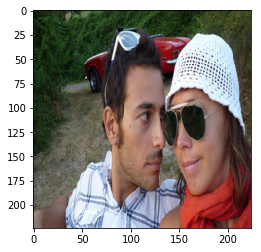

['a', 'couple', 'practice', 'different', 'to', 'wear', 'sunglasses', 'in', 'front', 'of', 'a', 'red', 'car']
['a', 'girl', 'and', 'boy', 'with', 'sunglasses', 'and', 'a', 'red', 'car', 'behind', 'them']
['a', 'man', 'with', 'sunglasses', 'and', 'a', 'woman', 'with', 'a', 'hat', 'are', 'in', 'front', 'of', 'a', 'car']
['a', 'man', 'with', 'sunglasses', 'on', 'his', 'head', 'is', 'looking', 'at', 'the', 'woman', 'with', 'a', 'white', 'hat', 'and', 'red', 'scarf', 'next', 'to', 'him', 'whilst', 'standing', 'in', 'front', 'of', 'a', 'red', 'sports', 'car']
['a', 'woman', 'in', 'a', 'hat', 'and', 'sunglasses', 'smiles', 'while', 'the', 'man', 'beside', 'her', 'in', 'a', 'plaid', 'short', 'and', 'sunglasses', 'looks', 'behind', 'her']
output: ['the', 'man', 'wearing', 'a', 'in', 'and', 'a']
5.3388148574614e-155


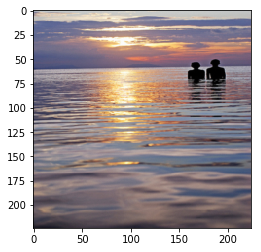

['two', 'boys', 'stand', 'in', 'an', 'ocean', 'as', 'the', 'sun', 'sets']
['two', 'people', 'are', 'wading', 'in', 'the', 'water', 'as', 'the', 'sun', 'off', 'of', 'the', 'water']
['two', 'people', 'in', 'water']
['two', 'people', 'stand', 'elbow', 'deep', 'in', 'the', 'ocean', 'watching', 'the', 'sunset']
['two', 'people', 'swim', 'in', 'the', 'water', 'at', 'sunset']
output: ['a', 'dog', 'in', 'in', 'a', 'water']
1.384292958842266e-231


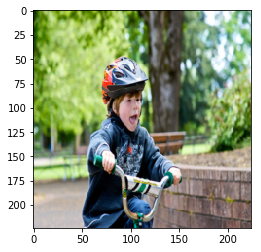

['a', 'boy', 'with', 'a', 'blue', 'helmet', 'is', 'riding', 'a', 'bike']
['a', 'young', 'boy', 'has', 'his', 'mouth', 'open', 'as', 'he', 'rides', 'his', 'bike', 'outdoors', 'past', 'a', 'stone', 'wall']
['a', 'young', 'boy', 'is', 'riding', 'a', 'bike']
['a', 'young', 'boy', 'wearing', 'a', 'helmet', 'and', 'riding', 'a', 'bike', 'in', 'a', 'park']
['the', 'boy', 'with', 'the', 'red', 'and', 'blue', 'helmet', 'rides', 'his', 'bicycle']
output: ['a', 'the', 'man', 'wearing', 'on', 'in', 'and', 'and', 'a']
1.4730943587001306e-231


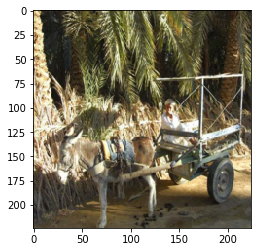

['a', 'pulling', 'a', 'cart', 'with', 'a', 'boy', 'in', 'it', 'takes', 'a']
['a', 'pulling', 'a', 'car', 'with', 'a', 'man', 'on', 'it']
['a', 'is', 'carring', 'a', 'man', 'in', 'a', 'cart', 'next', 'to', 'some', 'palm', 'trees']
['a', 'pulling', 'a', 'carriage', 'with', 'a', 'man', 'inside', 'along', 'a', 'dirt', 'path']
['a', 'person', 'is', 'pulled', 'in', 'a', 'cart', 'by', 'a']
output: ['a', 'group', 'in', 'in', 'are', 'in', 'a']
5.795035077445241e-155


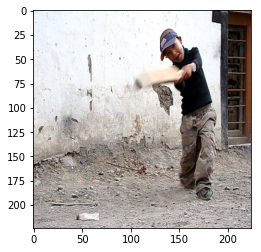

['a', 'boy', 'in', 'a', 'dusty', 'alley', 'playing']
['a', 'boy', 'swings', 'a', 'piece', 'of', 'wood']
['a', 'child', 'swings', 'a', 'bat', 'next', 'to', 'a', 'stone', 'wall']
['a', 'young', 'boy', 'wearing', 'a', 'blue', 'visor', 'swings', 'a', 'bat']
['a', 'young', 'boy', 'with', 'a', 'visor', 'on', 'plays', 'ball', 'with', 'his', 'bat', 'in', 'the', 'street']
output: ['man', 'man', 'man', 'in', 'black', 'tucked', 'and', 'a']
1.2882297539194154e-231


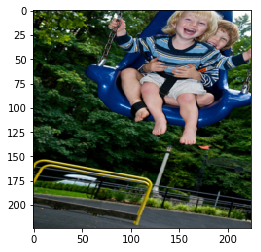

['a', 'couple', 'of', 'smiling', 'little', 'boys', 'ride', 'together', 'in', 'a', 'plastic', 'chair', '-', 'swing', 'one', 'on', 'the', 'other', "'s", 'lap']
['children', 'swinging', 'on', 'a', 'blue', 'swing', 'in', 'the', 'park']
['the', 'two', 'children', 'swinging', 'together', 'on', 'a', 'swing']
['two', 'little', 'kids', 'laugh', 'on', 'a', 'blue', 'swing']
['two', 'smiling', 'small', 'children', 'one', 'child', 'holding', 'the', 'other', 'on', 'a', 'swing']
output: ['two', 'young', 'in', 'on', 'in', 'a', 'a']
7.595569210207636e-155


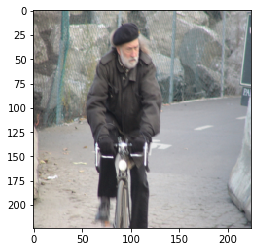

['a', 'man', 'in', 'a', 'beret', 'rides', 'a', 'bicycle', 'down', 'the', 'street']
['a', 'man', 'wearing', 'a', 'beret', 'rides', 'his', 'bicycle', 'on', 'a', 'trail']
['an', 'old', 'man', 'with', 'a', 'grey', 'beard', 'riding', 'his', 'bike']
['closeup', 'of', 'a', 'man', 'cycling', 'down', 'a', 'road', 'lined', 'with', 'boulders']
['man', 'wearing', 'a', 'beret', 'riding', 'a', 'bicycle']
output: ['a', 'man', 'man', 'a', 'black', 'a', 'a']
8.286571670851008e-155


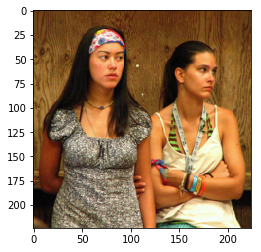

['two', 'females', 'are', 'standing', 'next', 'to', 'each', 'other', 'and', 'appear', 'to', 'be']
['two', 'girls', 'are', 'standing', 'by', 'a', 'wooden', 'wall', 'looking', 'off', 'to', 'their', 'left']
['two', 'women', 'with', 'black', 'hair', 'stand', 'in', 'front', 'of']
['two', 'young', 'women', 'are', 'leaning', 'up', 'against', 'a', 'wooden', 'wall']
['two', 'young', 'women', 'one', 'with', 'folded', 'arms', 'look', 'off', 'screen']
output: ['a', 'young', 'are', 'in', 'a', 'in', 'and']
1.258612894984676e-231


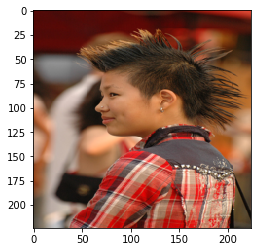

['a', 'girl', 'with', 'a', 'nose', 'ring', 'earring', 'and', 'mohawk']
['a', 'person', 'with', 'spiky', 'hair', 'looks', 'to', 'the', 'left']
['a', 'profile', 'of', 'a', 'young', 'person', 'with', 'a', 'punk', 'hairstyle', 'and', 'pierced', 'ear', 'and', 'nose', 'in', 'a', 'cowboy', 'shirt']
['a', 'young', 'person', 'with', 'a', 'mohawk', 'and', 'a', 'nose', 'piercing', 'in', 'a', 'plaid', 'shirt']
['the', 'person', 'is', 'posing', 'in', 'a', 'red', 'flannel', 'shirt', 'with', 'a', 'mohawk']
output: ['a', 'a', 'man', 'and', 'in', 'the', 'and']
1.3173084827829354e-231


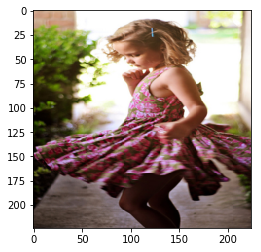

['a', 'girl', 'twirls', 'in', 'a', 'pink', 'dress']
['a', 'little', 'girl', 'dancing', 'in', 'a', 'pink', 'and', 'green', 'dress']
['a', 'little', 'girl', 'twirls', 'around', 'in', 'a', 'flowery', 'dress']
['a', 'young', 'girl', 'in', 'a', 'pink', 'dress', 'is', 'dancing']
['blonde', 'girl', 'in', 'green', 'dress', 'with', 'pink', 'flowers']
output: ['the', 'an', 'woman', 'girl', 'a', 'in', 'a']
8.286571670851008e-155


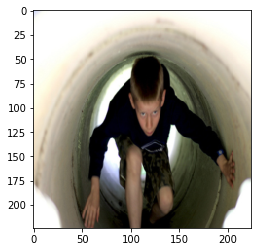

['a', 'boy', 'crawling', 'through', 'a', 'cement']
['a', 'boy', 'in', 'a', 'tube']
['a', 'young', 'boy', 'dressed', 'in', 'a', 'black', 'hoodie', 'crawling', 'through', 'a', 'large', 'white', 'tube']
['a', 'young', 'boy', 'is', 'crawling', 'through', 'a', 'white', 'tube']
['boy', 'crawling', 'through', 'a', 'cement', 'tunnel']
output: ['two', 'child', 'in', 'is', 'the', 'a', 'a']
1.583976781977924e-231


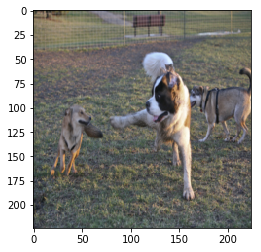

['a', 'big', 'dog', 'holds', 'its', 'paw', 'out', 'to', 'keep', 'another', 'dog', 'at', 'bay']
['a', 'large', 'dog', 'off', 'a', 'smaller', 'dog']
['large', 'dog', 'plays', 'with', 'two', 'smaller', 'dogs', 'on', 'grass']
['the', 'brown', 'and', 'white', 'great', 'dane', 'plays', 'with', 'two', 'yellow', 'dogs', 'in', 'the', 'grass']
['two', 'smaller', 'dogs', 'and', 'one', 'larger', 'dog', 'with', 'a', 'puffy', 'white', 'tail', 'are', 'playing', 'in', 'a', 'field']
output: ['a', 'two', 'dogs', 'dogs', 'playing', 'in', 'the', 'in', 'a']
1.0962103931192249e-154


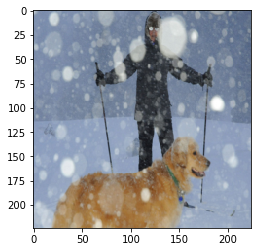

['a', 'golden', 'retreiver', 'standing', 'outside', 'in', 'the', 'snow', 'with', 'a', 'person', 'standing', 'with', 'skis', 'and', 'poles']
['a', 'man', 'and', 'a', 'dog', 'outside', 'in', 'a', 'snow', 'storm']
['a', 'person', 'is', 'standing', 'on', 'skis', 'in', 'the', 'snow', 'with', 'a', 'dog']
['person', 'with', 'skis', 'and', 'a', 'dog', 'are', 'standing', 'in', 'the', 'snow']
['the', 'man', 'is', 'skiing', 'in', 'the', 'snow', 'with', 'a', 'large', 'brown', 'dog']
output: ['the', 'little', 'is', 'is', 'a', 'dog', 'a', 'in']
6.646444782720929e-155


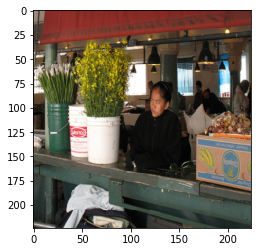

['an', 'oriental', 'florist', 'flowers']
['a', 'person', 'looking', 'to', 'the', 'right', 'standing', 'between', 'plants', 'in', 'buckets', 'and', 'a', 'banana', 'box']
['a', 'woman', 'dressed', 'in', 'black', 'standing', 'at', 'a', 'green', 'counter', 'with', 'of', 'flowers', 'placed', 'on', 'it']
['a', 'woman', 'is', 'standing', 'at', 'a', 'counter', 'that', 'is', 'holding', 'buckets', 'of', 'flowers']
['the', 'girl', 'is', 'sitting', 'at', 'the', 'counter', 'between', 'the', 'bucket', 'of', 'flowers', 'and', 'the', 'cardboard', 'boxes']
output: ['two', 'people', 'of', 'a', 'in', 'a', 'at']
1.674851531220629e-231


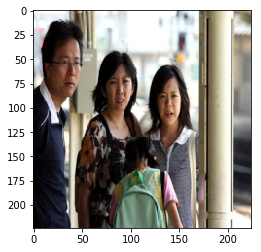

['a', 'group', 'of', 'people', 'stand', 'together', 'and', 'look', 'at', 'the', 'camera']
['a', 'man', 'a', 'woman', 'a', 'girl', 'and', 'a', 'younger', 'girl', 'look', 'puzzled', 'and', 'concerned']
['a', 'man', 'woman', 'and', 'one', 'girl', 'face', 'the', 'camera', 'while', 'one', 'girl', 'faces', 'away']
['oriental', 'man', 'and', 'two', 'women', 'facing', 'camera', 'and', 'young', 'child', 'with', 'back', 'to', 'camera']
['three', 'people', 'looking', 'concerned', 'facing', 'us', 'a', 'girl', 'in', 'a', 'facing', 'away']
output: ['a', 'three', 'man', 'in', 'in', 'a', 'in', 'a', 'and']
6.669660327594168e-155


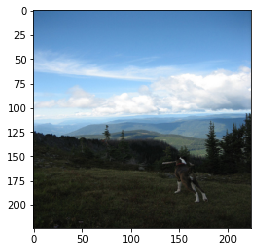

['a', 'black', 'and', 'white', 'dog', 'with', 'a', 'stick', 'in', 'his', 'mouth', 'standing', 'on', 'a', 'hill']
['a', 'dog', 'is', 'playing', 'catch', 'on', 'the', 'grassy', 'plain']
['a', 'dog', 'stands', 'at', 'the', 'top', 'of', 'a', 'mountain', 'and', 'looks', 'on']
['a', 'dog', 'stands', 'on', 'a', 'hill', 'looking', 'towards', 'the', 'valley', 'with', 'a', 'stick', 'in', 'its', 'mouth']
['brown', 'dog', 'holding', 'stick', 'in', 'mouth']
output: ['two', 'people', 'are', 'a', 'a', 'the']
1.5319719891192393e-231


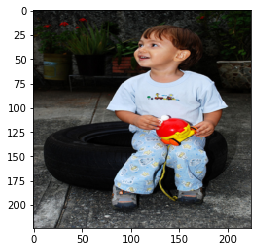

['a', 'baby', 'sits', 'on', 'a', 'tire', 'and', 'holds', 'a', 'toy']
['a', 'little', 'kid', 'with', 'a', 'red', 'toy', 'is', 'sitting', 'on', 'a', 'tire']
['boy', 'in', 'pajamas', 'with', 'red', 'and', 'yellow', 'toy', 'seated', 'on', 'tire', 'near', 'plants']
['child', 'holding', 'plastic', 'car', 'sits', 'on', 'a', 'tire']
['the', 'child', 'is', 'sitting', 'on', 'the', 'street', 'playing', 'with', 'a', 'red', 'toy']
output: ['a', 'a', 'boy', 'in', 'wearing', 'red', 'red', 'a', 'and', 'a']
7.877458036488388e-155


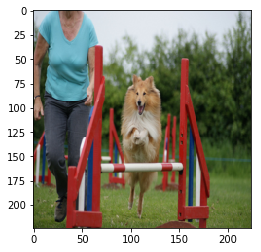

['a', 'woman', 'in', 'a', 'blue', 'shirt', 'her', 'dog', 'over', 'an', 'obstacle']
['a', 'woman', 'is', 'running', 'beside', 'a', 'dog', 'that', 'is', 'jumping', 'over', 'a', 'red', 'and', 'white', 'obedience', 'training', 'fence']
['a', 'woman', 'next', 'to', 'a', 'dog', 'which', 'is', 'running', 'an', 'obstacle', 'course']
['a', 'woman', 'walking', 'with', 'a', 'sheltie', 'through', 'a', 'competition', 'obstacle', 'course']
['the', 'dog', 'is', 'jumping', 'over', 'the', 'hurdles', 'beside', 'a', 'woman']
output: ['three', 'dog', 'dog', 'a', 'over', 'a', 'a', 'a']
6.3502977614349235e-155


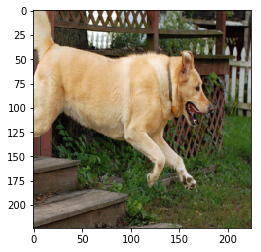

['a', 'blond', 'dog', 'runs', 'down', 'a', 'flight', 'of', 'stairs', 'to', 'the', 'backyard']
['a', 'dog', 'jumps', 'off', 'the', 'stairs']
['a', 'tan', 'dog', 'runs', 'down', 'a', 'wooden', 'staircase', 'to', 'the', 'green', 'grass']
['a', 'yellow', 'dog', 'is', 'jumping', 'across', 'a', 'grassy', 'yard', 'in', 'front', 'of', 'a', 'wooden', 'deck']
['a', 'yellow', 'dog', 'jumping', 'off', 'of', 'a', 'porch']
output: ['a', 'dog', 'and', 'dog', 'the', 'the', 'the']
7.711523862191631e-155


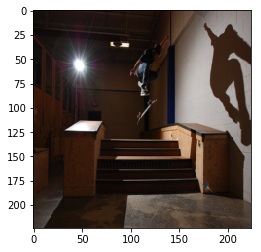

['a', 'skateboarder', 'casts', 'a', 'shadow', 'jumping', 'down', 'stairs']
['a', 'skateboarder', 'flies', 'off', 'the', 'stairs']
['a', 'skateboarder', 'jumps', 'a', 'staircase']
['a', 'skateboarder', 'performing', 'a', 'kickflip', 'over', 'short', 'stairs']
['skateboarder', 'jumping', 'down', 'a', 'short', 'flight', 'of', 'stairs', 'in', 'a', 'dimly', 'lit', 'warehouse']
output: ['a', 'man', 'is', 'on', 'a']
1.4488496539373276e-231


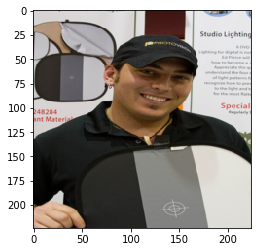

['a', 'man', 'in', 'a', 'black', 'cap', 'and', 'shirt', 'smiling', 'while', 'holding', 'a', 'white', 'grey', 'and', 'black', 'object']
['a', 'man', 'smiles', 'and', 'poses', 'with', 'a', 'product', 'he', 'appears', 'to', 'be', 'trying', 'to', 'sell']
['a', 'man', 'wearing', 'a', 'black', 'shirt', 'and', 'baseball', 'cap', 'smiling']
['the', 'man', 'is', 'wearing', 'a', 'black', 'shirt', 'and', 'hat', 'and', 'smiling']
['there', 'is', 'a', 'man', 'with', 'a', 'black', 'shirt', 'and', 'a', 'black', 'hat', 'smiling']
output: ['the', 'man', 'man', 'with', 'in', 'and', 'and', 'a']
9.090890195495885e-155


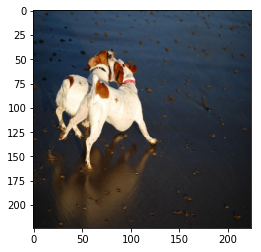

['dogs', 'chase', 'each', 'other']
['two', 'brown', 'and', 'white', 'dogs', 'wrestle', 'while', 'running', 'across', 'the', 'wet', 'sand']
['two', 'dogs', 'identical', 'white', 'with', 'brown', 'spots', 'wrestle', 'on', 'jet', 'black', 'sand']
['two', 'white', 'and', 'brown', 'dogs', 'playing', 'on', 'a', 'beach']
['two', 'white', 'dogs', 'with', 'brown', 'markings', 'playing']
output: ['two', 'a', 'dogs', 'dogs', 'are', 'in', 'the', 'a']
1.5319719891192393e-231


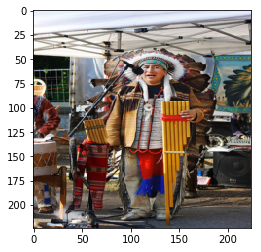

['a', 'man', 'dressed', 'as', 'an', 'indian', 'speaking', 'into', 'a', 'microphone']
['a', 'native', 'american', 'stands', 'at', 'a', 'microphone', 'ready', 'to', 'play', 'his', 'instrument']
['an', 'indian', 'chief', 'in', 'full', 'dress']
['indian', 'wearing', 'speaks']
['the', 'man', 'dressed', 'an', 'indian', 'wearing', 'feathers', 'is', 'standing', 'in', 'front', 'of', 'the', 'microphone']
output: ['three', 'men', 'are', 'a', 'the', 'a']
1.5319719891192393e-231


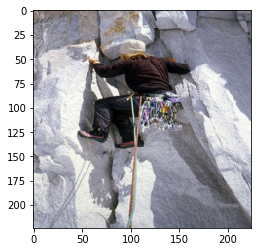

['a', 'girl', 'is', 'climbing', 'a', 'rock', 'wall']
['a', 'person', 'climbs', 'a', 'steep', 'mountain']
['a', 'person', 'wearing', 'a', 'white', 'hat', 'climbs', 'a', 'rock']
['a', 'rock', 'climber', 'ascends']
['someone', 'climbs', 'a', 'rocks']
output: ['the', 'people', 'wearing', 'in', 'in', 'and']
1.1640469867513693e-231


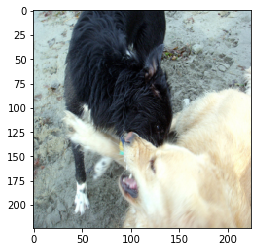

['a', 'black', 'dog', 'and', 'a', 'tan', 'dog', 'fighting']
['a', 'black', 'dog', 'and', 'a', 'white', 'dog', 'are', 'wrestling', 'on', 'the', 'ground']
['a', 'black', 'dog', 'bites', 'a', 'white', 'dog', 'while', 'standing', 'on', 'the', 'sand']
['two', 'dogs', 'fight']
['two', 'dogs', 'one', 'white', 'and', 'one', 'black', 'play', 'with', 'each', 'other', 'in', 'the', 'sand']
output: ['a', 'two', 'dog', 'dog', 'dog', 'in', 'a', 'a']
1.6954057018456463e-231


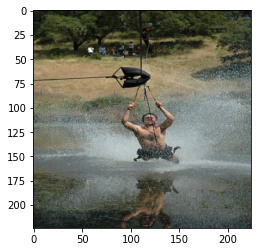

['a', 'man', 'in', 'a', 'harness', 'being', 'dragged', 'across', 'the', 'water']
['a', 'man', 'in', 'a', 'harness', 'lands', 'in', 'the', 'water']
['a', 'man', 'on', 'a', 'tag', 'line', 'going', 'into', 'the', 'water']
['a', 'man', 'on', 'a', 'zip', 'line', 'being', 'propelled', 'through', 'the', 'water']
['a', 'man', 'wearing', 'bathing', 'trunks', 'is', 'parasailing', 'in', 'the', 'water']
output: ['two', 'a', 'man', 'is', 'down', 'on', 'a', 'a']
8.557332335294228e-155


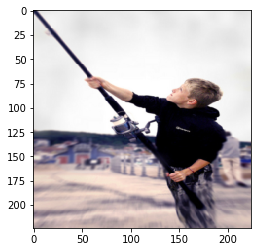

['a', 'blond', 'boy', 'in', 'a', 'dark', 'hoodie', 'is', 'holding', 'a', 'fishing', 'rod']
['a', 'boy', 'on', 'the', 'beach', 'casts', 'a', 'fishing', 'pole', 'in', 'the', 'water']
['a', 'little', 'boy', 'is', 'holding', 'a', 'fishing', 'rod']
['a', 'young', 'boy', 'wearing', 'a', 'black', 'hoodie', 'is', 'holding', 'a', 'fishing', 'pole']
['a', 'young', 'male', 'holding', 'a', 'fishing', 'pole']
output: ['the', 'dog', 'is', 'a', 'the']
1.1549495860711975e-231


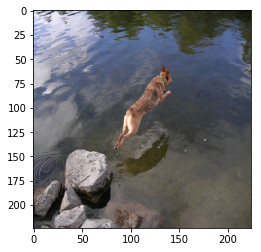

['a', 'brown', 'dog', 'jumping', 'off', 'a', 'rock', 'into', 'a', 'lake']
['a', 'brown', 'dog', 'leaps', 'into', 'water', 'from', 'a', 'rock']
['a', 'dog', 'is', 'taking', 'a', 'dive', 'into', 'a', 'body', 'of', 'water']
['a', 'dog', 'leaps', 'over', 'the', 'water', 'from', 'a', 'rock']
['the', 'dog', 'is', 'leaping', 'into', 'the', 'water']
output: ['two', 'two', 'child', 'is', 'a', 'in', 'a', 'a', 'a']
1.4875195904069663e-231


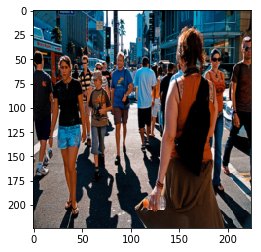

['a', 'crowd', 'of', 'people', 'walk', 'down', 'a', 'busy', 'sidewalk']
['a', 'group', 'of', 'different', 'people', 'are', 'walking', 'in', 'all', 'different', 'directions', 'in', 'a', 'city']
['a', 'group', 'of', 'people', 'walking', 'a', 'city', 'street', 'in', 'warm', 'weather']
['busy', 'intersection', 'in', 'the', 'summer', 'time', 'in', 'a', 'city']
['people', 'in', 'summer', 'clothes', 'are', 'walking', 'on', 'the', 'sidewalk', 'of', 'a', 'large', 'city']
output: ['a', 'group', 'are', 'in', 'people', 'in', 'in']
8.19541720095112e-155


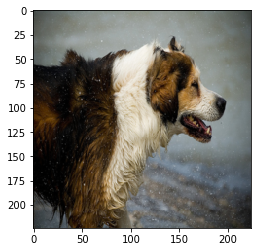

['a', 'brown', 'and', 'white', 'dog', 'stands', 'outside', 'while', 'it', 'snows']
['a', 'dog', 'is', 'looking', 'at', 'something', 'near', 'the', 'water']
['a', 'furry', 'dog', 'attempts', 'to', 'dry', 'itself', 'by', 'shaking', 'the', 'water', 'off', 'its', 'coat']
['a', 'white', 'and', 'brown', 'dog', 'shaking', 'its', 'self', 'dry']
['the', 'large', 'brown', 'and', 'white', 'dog', 'shakes', 'off', 'water']
output: ['a', 'two', 'brown', 'and', 'a', 'a', 'dog', 'the', 'a']
9.106239987484608e-155


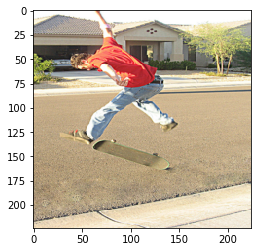

['a', 'man', 'in', 'an', 'orange', 'shirt', 'flips', 'his', 'skateboard', 'on', 'a', 'suburban', 'street']
['a', 'man', 'in', 'a', 'red', 'shirt', 'is', 'performing', 'an', 'aerial', 'trick', 'with', 'a', 'skateboard', 'on', 'a', 'sidewalk']
['a', 'skateboarder', 'in', 'the', 'air', 'above', 'his', 'board', 'on', 'a', 'residential', 'street']
['a', 'young', 'man', 'jumps', 'up', 'off', 'his', 'skateboard', 'on', 'the', 'street', 'in', 'front', 'of', 'a', 'house']
['the', 'guy', 'is', 'wearing', 'a', 'red', 'shirt', 'and', 'doing', 'a', 'aerial', 'flip', 'with', 'his', 'skateboard']
output: ['two', 'a', 'boy', 'is', 'on', 'the', 'on', 'on', 'a', 'a']
7.379857967341252e-155


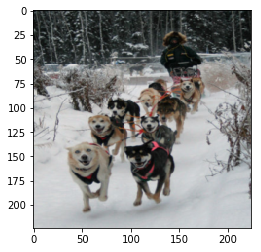

['a', 'team', 'runs', 'through', 'a', 'snowy', 'trail']
['a', 'pack', 'of', 'huskies', 'run', 'across', 'the', 'snowy', 'ground']
['a', 'sled', 'and', 'dogs']
['the', 'dogs', 'run', 'in', 'the', 'snow', 'pulling', 'a', 'sled', 'with', 'a', 'person']
['the', 'dog', 'team', 'is', 'pulling', 'the', 'man', 'on', 'the', 'sled']
output: ['two', 'black', 'dogs', 'a', 'a', 'a', 'a']
1.4740564900137075e-231


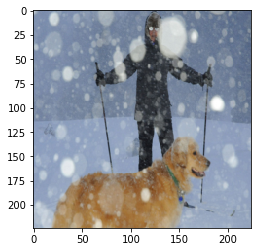

['a', 'golden', 'retreiver', 'standing', 'outside', 'in', 'the', 'snow', 'with', 'a', 'person', 'standing', 'with', 'skis', 'and', 'poles']
['a', 'man', 'and', 'a', 'dog', 'outside', 'in', 'a', 'snow', 'storm']
['a', 'person', 'is', 'standing', 'on', 'skis', 'in', 'the', 'snow', 'with', 'a', 'dog']
['person', 'with', 'skis', 'and', 'a', 'dog', 'are', 'standing', 'in', 'the', 'snow']
['the', 'man', 'is', 'skiing', 'in', 'the', 'snow', 'with', 'a', 'large', 'brown', 'dog']
output: ['the', 'man', 'dog', 'is', 'is', 'a', 'is', 'on']
6.646444782720929e-155


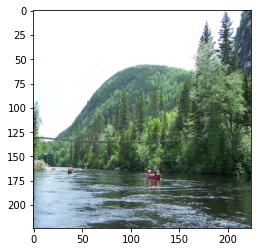

['a', 'kayak', 'on', 'the', 'river', 'is', 'passing', 'by', 'a', 'wire', 'bridge', 'that', 'both', 'banks']
['some', 'people', 'ride', 'their', 'kayaks', 'down', 'the', 'river']
['two', 'float', 'down', 'the', 'river']
['two', 'groups', 'are', 'canoeing', 'on', 'a', 'river', 'overlooking', 'a', 'mountain']
['two', 'people', 'rafting', 'down', 'a', 'river', 'a', 'footbridge', 'in', 'the', 'background']
output: ['the', 'two', 'boy', 'are', 'on', 'in', 'the']
7.595569210207636e-155


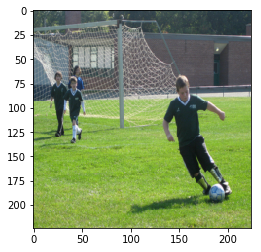

['a', 'boy', 'in', 'a', 'green', 'uniform', 'is', 'kicking', 'a', 'soccer', 'ball', 'in', 'a', 'game', 'while', 'two', 'others', 'stand', 'behind', 'him']
['boys', 'play', 'soccer', 'near', 'a', 'goal', 'post']
['some', 'children', 'are', 'playing', 'soccer', 'on', 'a', 'sports', '-', 'field', 'by', 'the', 'goal']
['the', 'little', 'boy', 'gets', 'ready', 'to', 'kick', 'the', 'soccer', 'ball']
['three', 'boys', 'play', 'soccer']
output: ['two', 'a', 'playing', 'soccer', 'player', 'soccer', 'a', 'the', 'a']
7.453472598117588e-155


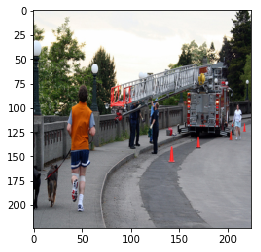

['a', 'firetruck', 'stops', 'and', 'makes', 'a', 'call', 'at', 'a', 'bridge', 'where', 'a', 'man', 'and', 'his', 'dogs', 'are', 'running']
['a', 'firetruck', 'with', 'ladder', 'extended', 'on', 'the', 'side', 'of', 'the', 'road']
['a', 'jogger', 'with', 'a', 'dog', 'approaches', 'a', 'ladder', 'truck']
['a', 'jogger', 'with', 'a', 'dog', 'running', 'towards', 'a', 'firetruck', 'with', 'extended', 'ladder', 'on', 'a', 'road']
['a', 'man', 'walks', 'on', 'a', 'sidewalk', 'and', 'a', 'firetruck', 'is', 'nearby']
output: ['a', 'man', 'people', 'footbride', 'a', 'a', 'and', 'and', 'a', 'the', 'the', 'the']
9.064562738204195e-155


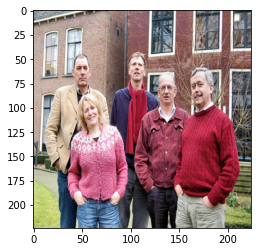

['a', 'family', 'picture']
['a', 'group', 'of', 'adults', 'wear', 'sweaters', 'and', 'have', 'their', 'hands', 'in', 'their']
['a', 'group', 'of', 'five', 'adults', 'stand', 'posing', 'in', 'front', 'of', 'buildings']
['a', 'group', 'of', 'people', 'stand', 'together', 'and', 'pose', 'in', 'front', 'of', 'a', 'house']
['a', 'group', 'shot', 'of', 'four', 'guys', 'and', 'one', 'girl', 'in', 'front', 'of', 'a', 'brick', 'building']
output: ['a', 'three', 'man', 'are', 'in', 'people', 'in', 'a']
1.052907923529733e-231


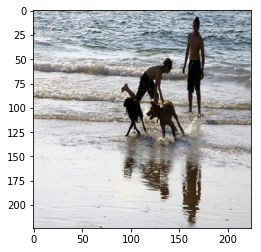

['two', 'boys', 'and', 'two', 'dogs', 'are', 'playing', 'in', 'the', 'sand', 'and', 'water', 'at', 'the', 'seashore']
['two', 'boys', 'are', 'playing', 'with', 'two', 'dogs', 'on', 'the', 'beach']
['two', 'boys', 'play', 'with', 'two', 'dogs', 'at', 'the', 'shore']
['two', 'boys', 'play', 'with', 'two', 'dogs', 'next', 'to', 'the', 'ocean']
['two', 'guys', 'are', 'playing', 'with', 'two', 'dogs', 'on', 'the', 'beach']
output: ['two', 'children', 'are', 'on', 'on', 'the']
5.467133248249545e-155


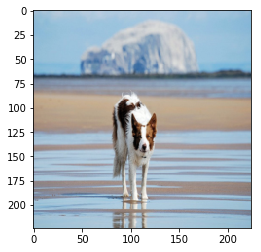

['a', 'brown', 'and', 'white', 'dog', 'is', 'standing', 'in', 'shallow', 'water', 'on', 'a', 'beach', 'near', 'a', 'large', 'rock']
['a', 'brown', 'and', 'white', 'dog', 'on', 'the', 'beach']
['a', 'dog', 'standing', 'on', 'a', 'beach']
['a', 'dog', 'stands', 'on', 'the', 'beach', 'with', 'a', 'large', 'rock', 'behind', 'him']
['an', 'unusual', 'looking', 'dog', 'is', 'standing', 'in', 'front', 'of', 'a', 'beautiful', 'backdrop']
output: ['the', 'dog', 'is', 'through', 'a', 'in', 'a', 'a']
8.869511863657866e-155


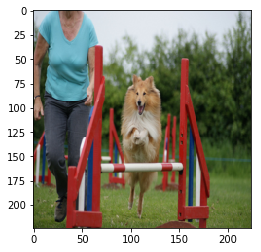

['a', 'woman', 'in', 'a', 'blue', 'shirt', 'her', 'dog', 'over', 'an', 'obstacle']
['a', 'woman', 'is', 'running', 'beside', 'a', 'dog', 'that', 'is', 'jumping', 'over', 'a', 'red', 'and', 'white', 'obedience', 'training', 'fence']
['a', 'woman', 'next', 'to', 'a', 'dog', 'which', 'is', 'running', 'an', 'obstacle', 'course']
['a', 'woman', 'walking', 'with', 'a', 'sheltie', 'through', 'a', 'competition', 'obstacle', 'course']
['the', 'dog', 'is', 'jumping', 'over', 'the', 'hurdles', 'beside', 'a', 'woman']
output: ['two', 'dog', 'dog', 'running', 'a', 'a', 'a', 'a', 'a', 'a']
1.5319719891192393e-231


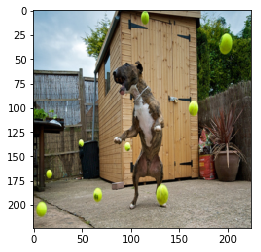

['a', 'big', 'dog', 'stands', 'on', 'his', 'hand', 'leg', 'as', 'tennis', 'balls', 'are', 'thrown', 'his', 'direction']
['a', 'brown', 'and', 'white', 'dog', 'in', 'front', 'of', 'a', 'shed', 'by', 'the', 'of', 'tennis', 'balls']
['a', 'brown', 'and', 'white', 'dogs', 'stands', 'in', 'front', 'of', 'a', 'wooden', 'building', 'while', 'tennis', 'balls', 'fly', 'through', 'the', 'air']
['a', 'dog', 'jumps', 'for', 'several', 'tennis', 'balls', 'thrown', 'at', 'him']
['a', 'dog', 'stands', 'on', 'his', 'hind', 'legs', 'amid', 'a', 'shower', 'of', 'tennis', 'balls']
output: ['a', 'a', 'red', 'dog', 'dog', 'dog', 'ball', 'in', 'a', 'ball']
1.4488496539373276e-231


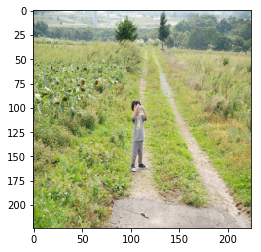

['a', 'boy', 'is', 'playing', 'with', 'a', 'camera', 'whilst', 'standing', 'on', 'a', 'dirt', 'track']
['a', 'child', 'in', 'a', 'field']
['a', 'kid', 'standing', 'in', 'the', 'middle', 'of', 'a', 'dirt', 'road']
['a', 'young', 'child', 'stands', 'in', 'a', 'path', 'in', 'a', 'field', 'of']
['small', 'child', 'with', 'black', 'hair', 'standing', 'in', 'car', 'track', 'near']
output: ['a', 'woman', 'and', 'in', 'the', 'in']
9.013778876140909e-155


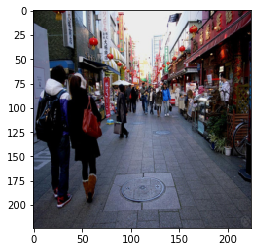

['a', 'busy', 'city', 'street', 'with', 'many', 'people', 'walking', 'along', 'it']
['a', 'couple', 'walk', 'to', 'the', 'side', 'of', 'a', 'crowded', 'walkway']
['chinese', 'market', 'street', 'in', 'the', 'winter', 'time']
['people', 'walk', 'down', 'a', 'paved', 'street', 'that', 'has', 'red', 'hung', 'from', 'the', 'buildings']
['people', 'walking', 'down', 'street', 'lined', 'with', 'chinese']
output: ['a', 'man', 'are', 'the', 'and', 'and', 'and']
1.331960397810445e-231


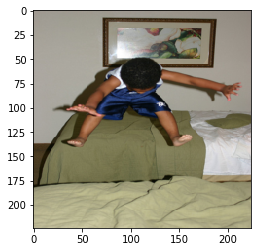

['a', 'boy', 'is', 'jumping', 'on', 'a', 'bed']
['a', 'boy', 'jumped', 'up', 'from', 'the', 'green', 'bed']
['a', 'boy', 'jumps', 'from', 'one', 'bed', 'to', 'another']
['a', 'small', 'child', 'is', 'jumping', 'on', 'a', 'bed']
['the', 'boy', 'in', 'blue', 'shorts', 'is', 'bouncing', 'on', 'the', 'bed']
output: ['the', 'boy', 'is', 'is', 'a', 'a', 'a']
1.04198122363916e-154


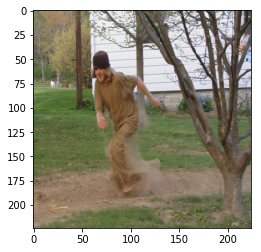

['a', 'boy', 'is', 'kicking', 'up', 'dust', 'as', 'he', 'runs', 'in', 'the', 'dirt', 'by', 'a', 'tree']
['a', 'boy', 'wearing', 'brown', 'running', 'in', 'dirt']
['a', 'dirty', 'boy', 'runs', 'through', 'the', 'dirt']
['a', 'dusty', 'boy', 'runs', 'along', 'a', 'dirt', 'path', 'through', 'the', 'grass']
['a', 'teenage', 'boy', 'runs', 'through', 'the', 'dirt', 'near', 'a', 'house', 'in', 'the', 'country']
output: ['a', 'a', 'brown', 'are', 'in', 'a', 'the']
1.674851531220629e-231


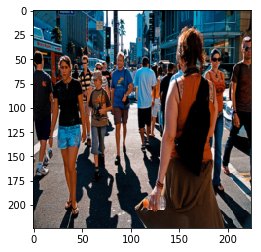

['a', 'crowd', 'of', 'people', 'walk', 'down', 'a', 'busy', 'sidewalk']
['a', 'group', 'of', 'different', 'people', 'are', 'walking', 'in', 'all', 'different', 'directions', 'in', 'a', 'city']
['a', 'group', 'of', 'people', 'walking', 'a', 'city', 'street', 'in', 'warm', 'weather']
['busy', 'intersection', 'in', 'the', 'summer', 'time', 'in', 'a', 'city']
['people', 'in', 'summer', 'clothes', 'are', 'walking', 'on', 'the', 'sidewalk', 'of', 'a', 'large', 'city']
output: ['two', 'a', 'people', 'in', 'are', 'in', 'and']
6.58443108435194e-155


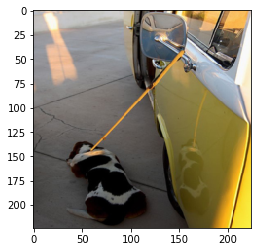

['a', 'basset', 'hound', 'is', 'leashed', 'to', 'the', 'mirror', 'of', 'a', 'yellow', 'and', 'white', 'vehicle']
['a', 'black', 'and', 'white', 'dog', 'tied', 'to', 'a', 'yellow', 'and', 'white', 'van']
['a', 'dog', 'lying', 'down', 'tethered', 'to', 'the', 'side', 'mirror', 'of', 'a', 'yellow', 'bus']
['a', 'dog', 'with', 'black', 'white', 'and', 'brown', 'coloring', 'is', 'leashed', 'up', 'to', 'a', 'mirror']
['the', 'black', 'and', 'white', 'dog', 'is', 'tethered', 'next', 'to', 'a', 'yellow', 'car']
output: ['a', 'people', 'in', 'a', 'a', 'in', 'in']
6.520501036082648e-232


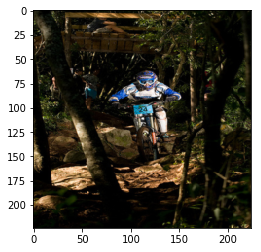

['a', 'dirt', 'biker', 'in', 'the', 'forest']
['a', 'dirt', 'biker', 'rides', 'his', 'through', 'the', 'woods']
['a', 'motocross', 'bike', 'is', 'being', 'ridden', 'along', 'a', 'woodland', 'path']
['a', 'motorcyclist', 'navigates', 'a', 'forest', 'trail']
['a', 'person', 'rides', 'a', 'motorbike', 'on', 'a', 'dirt', 'path', 'surrounded', 'by', 'trees']
output: ['man', 'person', 'in', 'in', 'a']
1.3127657569660467e-231


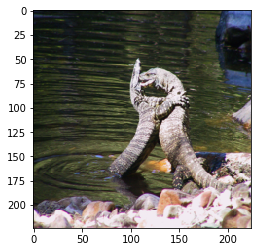

['the', 'along', 'the', 'rocky', 'water', 'bank']
['the', 'two', 'are', 'standing', 'on', 'their', 'back', 'legs', 'near', 'deep', 'water']
['two', 'fighting']
['two', 'fight', 'in', 'the', 'water']
['two', 'oriental', 'are', 'fighting', 'for', 'in', 'a', 'small', 'pond']
output: ['two', 'the', 'boy', 'in', 'in', 'in', 'in', 'a', 'a']
7.241926111174567e-155


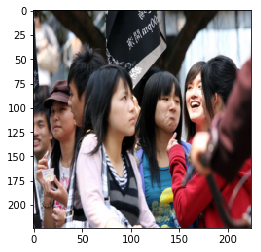

['a', 'group', 'of', 'girls', 'and', 'guys', 'hang', 'out', 'one', 'is', 'making', 'a', 'sad', 'face']
['a', 'group', 'of', 'women', ';', 'one', 'serious', 'one', 'frowning', 'and', 'another', 'smiling']
['a', 'woman', 'in', 'a', 'pink', 'sweater', 'looks', 'pensive', 'next', 'to', 'a', 'crowd', 'of', 'laughing', 'women']
['a', 'young', 'girl', 'gazes', 'at', 'something', 'in', 'the', 'distance', 'as', 'around', 'her', 'talk']
['there', 'are', 'oriental', 'people', 'standing', 'together']
output: ['a', 'a', 'young', 'of', 'in', 'are', 'in', 'and']
8.869511863657866e-155


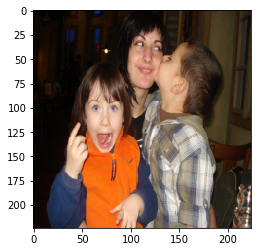

['a', 'boy', 'is', 'kissing', 'a', 'woman', 'on', 'the', 'cheek', 'next', 'to', 'a', 'girl', 'who', 'is', 'wide', 'eyed', 'and', 'sticking', 'out', 'her', 'tongue']
['a', 'mother', 'and', 'two', 'children', 'are', 'posing', 'with', 'funny', 'faces']
['an', 'adult', 'with', 'two', 'kids', 'one', 'child', 'making', 'a', 'face', 'and', 'the', 'other', 'kissing', 'the', 'adult', "'s", 'cheek']
['boy', 'kissing', 'woman', 'and', 'girl', 'sticking', 'out', 'her', 'tongue']
['mother', 'with', 'two', 'boys', 'one', 'acting', 'goofy', 'and', 'the', 'other', 'giving', 'her', 'a', 'kiss']
output: ['a', 'the', 'man', 'man', 'knit', 'knit', 'knit']
1.0009379942300742e-231


In [187]:
max_len = 30
encoder.eval()
decoder.eval()
with torch.no_grad():
    for idx, (img, caption, all_caption) in enumerate(test_dataloader):
        plt.imshow(img.cpu().numpy()[0].transpose(1,2,0))
        plt.show()
        img = img.to(device)
        caption = caption.to(device) # seq_len x batch_size

        decoder.zero_grad()
        encoder.zero_grad()

        encode_out = encoder(img)
        try:
            x = []
            for out_idx in range(encode_out.shape[0]):
                x.append([ test_dataset.vocab.stoi[a] for a in get_attr_encoded(encode_out[out_idx][None,:])])

            attrs = torch.tensor(x).to(device)
        except:
            x = []
            for out_idx in range(encode_out.shape[0]):
                x.append(' '.join(get_attr_encoded(encode_out[out_idx][None,:])))

            print(x)
            print(np.vectorize(lambda x: dataset.vocab.itos[x])(capts.cpu().numpy().squeeze()))
            raise ValueError
        hidden_logits, hidden_scores, input_scores, words = decoder(seq_len = max_len, image_vectors = encode_out,
                                                                    attributes=attrs, train=False)
                                                             
        out_caption = [ dataset.vocab.itos[x.item()] for x in words]
        
        all_capts_merged = ' '.join([ dataset.vocab.itos[x.item()] for x in all_caption[0]])
        all_capts_diff = [ x.strip() for x in all_capts_merged.split('<EOS>')][:-1]
        all_capts_diff = [ x.split(' ')+['<EOS>'] for x in all_capts_diff]
        
        for i,one_capt in enumerate(all_capts_diff):
            one_capt = [ x for x in one_capt if x not in ['<SOS>','<UNK>','<EOS>','<PAD>']+list(',./\\|\'\"')]
            all_capts_diff[i] = one_capt
            print(one_capt)
            
        gen_capt = [ x for x in out_caption if x not in ['<SOS>','<UNK>','<EOS>','<PAD>']+list(',./\\|\'\"')]
        
        print(f'output: {gen_capt}')
        score = sentence_bleu(all_capts_diff, gen_capt)
        print(score)

        if idx == 50:
            break

    pbar.refresh()

        